In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Set file path
file_path = '../data/Mushroom_25-05-08_0326.lvm'

# Check if file exists
if not os.path.exists(file_path):
    print(f"Error: File {file_path} does not exist")
else:
    # Read LVM file
    # LVM files are tab-separated text files without header
    data = pd.read_csv(file_path, sep='\t', header=None)
    
    # Based on file content, we need to name the columns
    # Assuming first column is timestamp, others are sensor data
    columns = ['Timestamp'] + [f'Sensor_{i}' for i in range(1, data.shape[1])]
    data.columns = columns
    
    # 删除最后一列
    data = data.iloc[:, :-1]


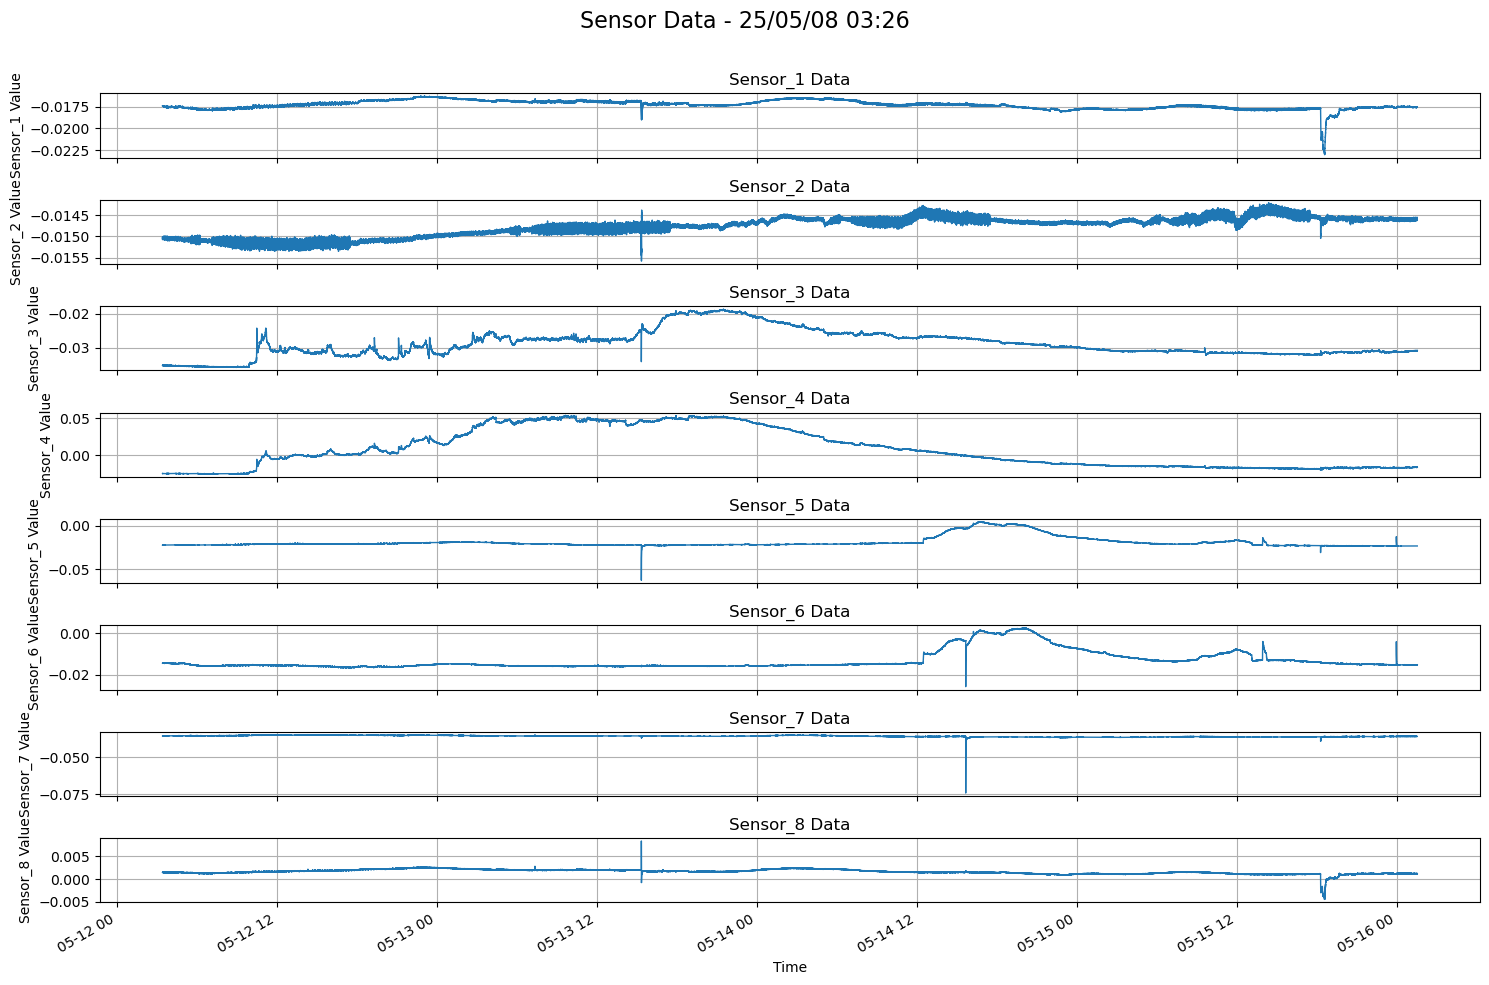

Sensor Statistics:

Sensor_1:
count    1.084420e+06
mean    -1.727884e-02
std      5.048720e-04
min     -2.300700e-02
25%     -1.762500e-02
50%     -1.728600e-02
75%     -1.690600e-02
max     -1.632500e-02
Name: Sensor_1, dtype: float64

Sensor_2:
count    1.084420e+06
mean    -1.481143e-02
std      2.283351e-04
min     -1.557400e-02
25%     -1.504800e-02
50%     -1.476700e-02
75%     -1.461900e-02
max     -1.421000e-02
Name: Sensor_2, dtype: float64

Sensor_3:
count    1.084420e+06
mean    -2.902471e-02
std      4.014688e-03
min     -3.576500e-02
25%     -3.148200e-02
50%     -2.978400e-02
75%     -2.700600e-02
max     -1.869200e-02
Name: Sensor_3, dtype: float64

Sensor_4:
count    1.084420e+06
mean     9.146397e-03
std      2.632990e-02
min     -2.506200e-02
25%     -1.520400e-02
50%      2.054000e-03
75%      3.857700e-02
max      5.387100e-02
Name: Sensor_4, dtype: float64

Sensor_5:
count    1.084420e+06
mean    -1.927404e-02
std      5.577440e-03
min     -6.273700e-02
25%     -2

In [2]:
# Extract date and time information from the filename
file_name = os.path.basename(file_path)  # Get the filename
date_time_str = file_name.split('_')[1:3]  # Extract date and time parts
date_str = date_time_str[0].replace('-', '/')  # Format date
time_str = date_time_str[1].replace('.lvm', '')  # Format time
# Parse time string, first two digits are hours, last two are minutes
hour = time_str[:2]
minute = time_str[2:]
formatted_time = f"{hour}:{minute}"

# Use actual timestamps and convert to specific times
actual_time = data['Timestamp']
# Calculate seconds relative to start time
start_time = actual_time.iloc[0]
relative_seconds = actual_time - start_time

# Create specific time labels
from datetime import datetime, timedelta
# Assume data recording started at the date and time specified in the filename
base_time = datetime(2025, 5, 12, int(hour), int(minute))  # Date and time parsed from filename
time_labels = [base_time + timedelta(seconds=s) for s in relative_seconds]

# Determine the number of sensors in the dataset
num_sensors = len([col for col in data.columns if 'Sensor_' in col])

# Create a figure with subplots for all sensors
plt.figure(figsize=(15, 10))

# Plot data for all sensors
for i in range(1, num_sensors + 1):
    sensor_name = f'Sensor_{i}'
    plt.subplot(num_sensors, 1, i)
    plt.plot(time_labels, data[sensor_name], linewidth=1)
    plt.title(f'{sensor_name} Data')
    plt.ylabel(f'{sensor_name} Value')
    plt.grid(True)
    
    # Only add x-label for the bottom subplot
    if i == num_sensors:
        plt.xlabel('Time')
    
    plt.gcf().autofmt_xdate()  # Automatically format x-axis date labels

# Add a main title for the entire figure
plt.suptitle(f'Sensor Data - {date_str} {formatted_time}', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Make room for the suptitle

# Display the figure
plt.show()

# Print basic statistics for all sensors
print("Sensor Statistics:")
for i in range(1, num_sensors+1):
    sensor_name = f'Sensor_{i}'
    print(f"\n{sensor_name}:\n{data[sensor_name].describe()}")


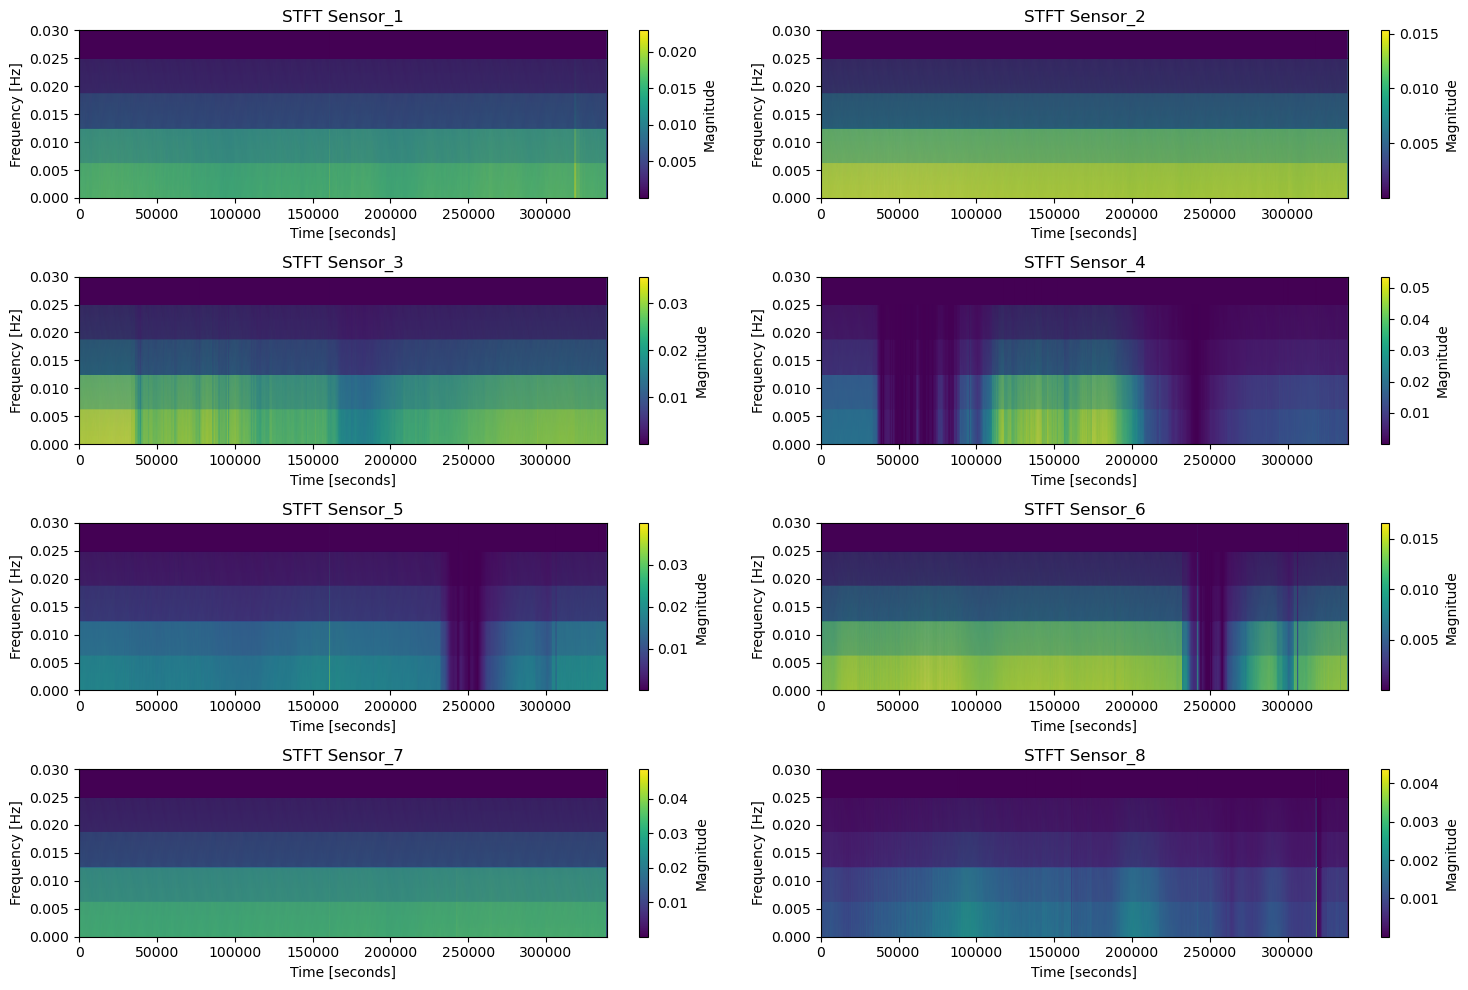

STFT analysis completed
Sampling rate: 3.20 Hz
Frequency resolution: 0.0125 Hz
Time resolution: 39.9933 seconds


In [3]:
# Perform Short-Time Fourier Transform (STFT) analysis
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

# Create a new figure for STFT analysis
plt.figure(figsize=(15, 10))

# Perform STFT on all sensor data
for i in range(1, 9):  # Assuming 8 sensors
    sensor_name = f'Sensor_{i}'
    
    # Get sensor data
    sensor_data = data[sensor_name].values
    
    # Calculate sampling rate (based on timestamp differences)
    sampling_rate = 1.0 / np.mean(np.diff(data['Timestamp']))
    
    # Perform STFT
    f, t, Zxx = signal.stft(sensor_data, fs=sampling_rate, nperseg=256)
    
    # Plot STFT results
    plt.subplot(4, 2, i)
    
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    
    plt.title(f'STFT {sensor_name}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [seconds]')
    plt.colorbar(label='Magnitude')
    plt.ylim(0, 0.03)  # Limit y-axis to 0.03Hz

plt.tight_layout()
plt.show()

# Print basic information about the STFT analysis
print(f"STFT analysis completed")
print(f"Sampling rate: {sampling_rate:.2f} Hz")
print(f"Frequency resolution: {f[1]-f[0]:.4f} Hz")
print(f"Time resolution: {t[1]-t[0]:.4f} seconds")


In [4]:
# Calculate the recording end time based on the timestamp
import datetime
# Extract start time from the filename (Mushroom_25-05-08_0326)
filename = file_path.split('/')[-1]
date_part = filename.split('_')[1]  # '25-05-08'
time_part = filename.split('_')[2]  # '0326'

# Handle potential file extension in time_part
if '.' in time_part:
    time_part = time_part.split('.')[0]  # Remove file extension if present

year = 2000 + int(date_part.split('-')[0])  # '25' -> 2025
month = int(date_part.split('-')[1])  # '05' -> 5
day = int(date_part.split('-')[2])  # '08' -> 8
hour = int(time_part[:2])  # '03' -> 3
minute = int(time_part[2:])  # '26' -> 26

start_time = datetime.datetime(year, month, day, hour, minute)

# Get the first and last timestamp
first_timestamp = data['Timestamp'].iloc[0]
last_timestamp = data['Timestamp'].iloc[-1]

# Calculate the duration in seconds
duration_seconds = last_timestamp - first_timestamp

# Calculate the end time
end_time = start_time + datetime.timedelta(seconds=duration_seconds)

# Format and print the results
print(f"Recording start time: {start_time.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Recording end time: {end_time.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Total recording duration: {duration_seconds:.2f} seconds ({duration_seconds/60:.2f} minutes)")


Recording start time: 2025-05-08 03:26:00
Recording end time: 2025-05-12 01:33:04
Total recording duration: 338824.48 seconds (5647.07 minutes)


In [11]:
# Parse the event time string
event_time_str = "2025-05-11T20:26:00.669Z"
# Time window for analysis
window_minutes = 30

In [6]:
# Function to find the closest timestamp in the data to a given event time
import pytz
import datetime

event_time = datetime.datetime.strptime(event_time_str, "%Y-%m-%dT%H:%M:%S.%fZ")
event_time = event_time.replace(tzinfo=pytz.UTC)  # Make it timezone-aware

# Make start_time timezone-aware as well
start_time = start_time.replace(tzinfo=pytz.UTC)

# Calculate seconds elapsed since recording start
elapsed_seconds = (event_time - start_time).total_seconds()

print(f"Event time: {event_time_str}")
print(f"Recording start time: {start_time.strftime('%Y-%m-%d %H:%M:%S %Z')}")
print(f"Seconds elapsed since recording start: {elapsed_seconds:.2f} seconds")

# Get the first timestamp from the data
first_timestamp = data['Timestamp'].iloc[0]

# Calculate the target timestamp by adding elapsed seconds to the first timestamp
target_timestamp = first_timestamp + elapsed_seconds

# Find the closest timestamp in the data
closest_idx = (data['Timestamp'] - target_timestamp).abs().idxmin()
closest_timestamp = data['Timestamp'].iloc[closest_idx]
closest_time_diff = abs(closest_timestamp - target_timestamp)

print(f"First data timestamp: {first_timestamp:.2f} seconds")
print(f"Target timestamp: {target_timestamp:.2f} seconds")
print(f"Closest data timestamp: {closest_timestamp:.2f} seconds")
print(f"Difference from target: {closest_time_diff:.2f} seconds")

# Extract the data at the closest timestamp
event_data = data.iloc[closest_idx]
print("\nSensor readings at event time:")
for column in data.columns:
    if column != 'Timestamp':
        print(f"{column}: {event_data[column]}")


Event time: 2025-05-11T20:26:00.669Z
Recording start time: 2025-05-08 03:26:00 UTC
Seconds elapsed since recording start: 320400.67 seconds
First data timestamp: 120386.54 seconds
Target timestamp: 440787.21 seconds
Closest data timestamp: 440787.18 seconds
Difference from target: 0.03 seconds

Sensor readings at event time:
Sensor_1: -0.017772
Sensor_2: -0.014626
Sensor_3: -0.031419
Sensor_4: -0.017389
Sensor_5: -0.022858
Sensor_6: -0.014578
Sensor_7: -0.03604
Sensor_8: 0.001091


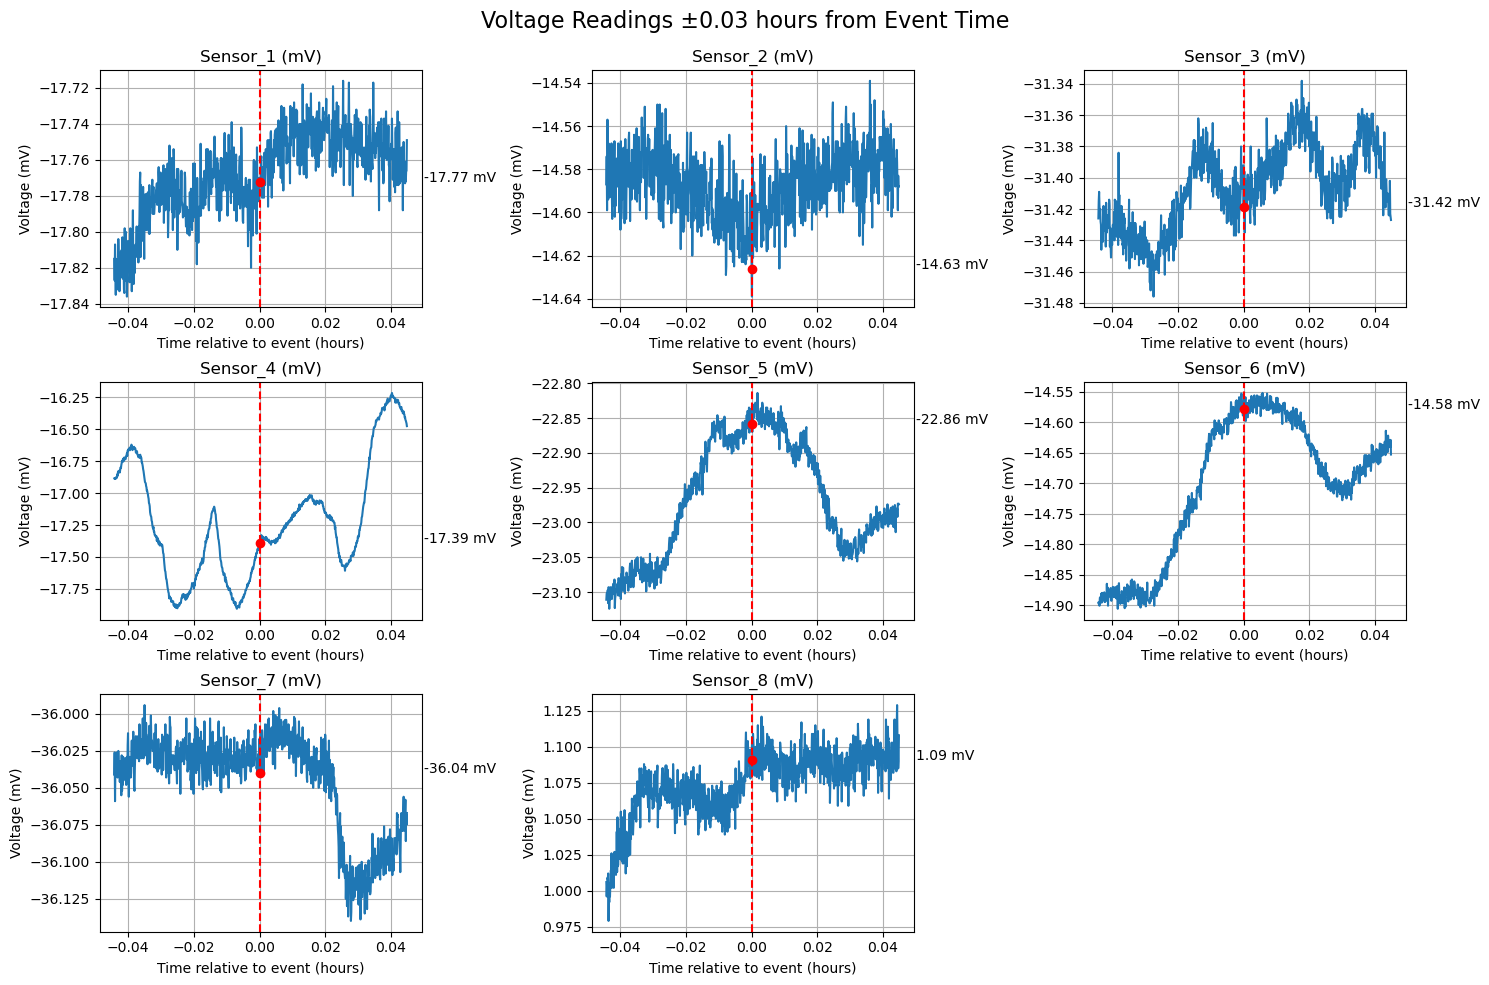

In [12]:
# Plot voltage data for 10 minutes before and after the event time
import matplotlib.pyplot as plt
import numpy as np

# Define the time window (given minutes before and after the event)
window_seconds = window_minutes * 60   # Convert minutes to seconds
event_idx = closest_idx
start_idx = max(0, event_idx - int(window_seconds * data['Timestamp'].diff().median() ** -1))
end_idx = min(len(data) - 1, event_idx + int(window_seconds * data['Timestamp'].diff().median() ** -1))

# Extract the data for the time window
window_data = data.iloc[start_idx:end_idx+1]

# Calculate time relative to the event (in seconds)
relative_time = window_data['Timestamp'] - closest_timestamp

# Convert seconds to hours
relative_time_hours = relative_time / 3600  # Convert to hours

# Create a figure with subplots for each voltage channel
plt.figure(figsize=(15, 10))
voltage_columns = [col for col in data.columns if col != 'Timestamp']

for i, column in enumerate(voltage_columns):
    plt.subplot(3, 3, i+1)
    
    # Convert voltage to millivolts
    voltage_mv = window_data[column] * 1000  # Convert to mV
    
    plt.plot(relative_time_hours, voltage_mv)
    plt.axvline(x=0, color='r', linestyle='--', label='Event time')
    plt.title(f'{column} (mV)')
    plt.xlabel('Time relative to event (hours)')
    plt.ylabel('Voltage (mV)')
    plt.grid(True)
    
    # Add a red dot at the event time point
    event_value_mv = event_data[column] * 1000  # Convert to mV
    plt.plot(0, event_value_mv, 'ro', markersize=6)  # Red dot at event time
    plt.text(0.05, event_value_mv, f'{event_value_mv:.2f} mV')  # Text label without arrow

plt.tight_layout()
plt.suptitle(f'Voltage Readings ±{window_minutes/60:.2f} hours from Event Time', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()


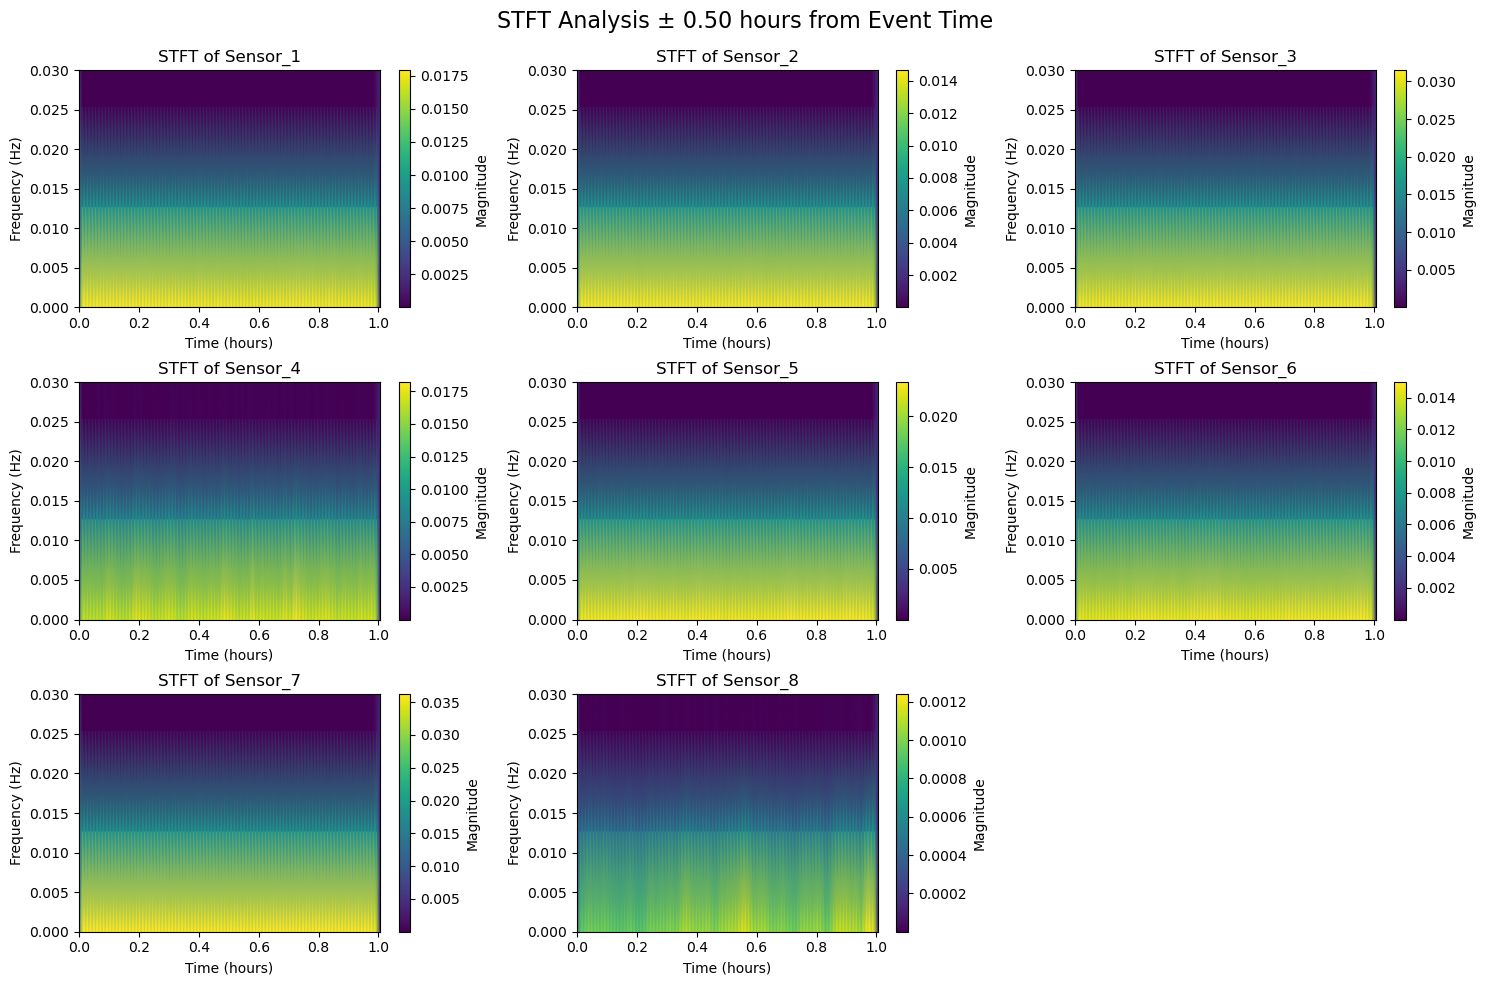

In [8]:
# Perform Short-Time Fourier Transform (STFT) analysis for each voltage channel
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

# Create a figure with subplots for STFT of each voltage channel
plt.figure(figsize=(15, 10))
voltage_columns = [col for col in data.columns if col != 'Timestamp']

# Calculate sampling frequency
sampling_freq = 1.0 / data['Timestamp'].diff().median()

for i, column in enumerate(voltage_columns):
    plt.subplot(3, 3, i+1)
    
    # Get voltage data for this channel
    voltage_data = window_data[column].values
    
    # Perform STFT
    f, t, Zxx = signal.stft(voltage_data, fs=sampling_freq, nperseg=256)
    
    # Convert time from seconds to hours
    t_hours = t / 3600
    
    # Plot the STFT magnitude (in dB)
    plt.pcolormesh(t_hours, f, np.abs(Zxx), shading='gouraud')
    
    # Mark the event time
    event_idx = np.argmin(np.abs(t_hours))
    plt.axvline(x=t_hours[event_idx], color='r', linestyle='--', label='event time')
    
    plt.title(f'STFT of {column}')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (hours)')
    plt.colorbar(label='Magnitude')
    plt.ylim(0, 0.03)
    
plt.tight_layout()
plt.suptitle(f'STFT Analysis ± {window_minutes/60:.2f} hours from Event Time', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()



=== Analysis for Sensor_1 ===
Analyzing frequency: 0.0254 Hz (closest to 0.02 Hz)
Average magnitude before event: 0.0001
Average magnitude after event: 0.0001
Change: -0.0000 (-27.67%)


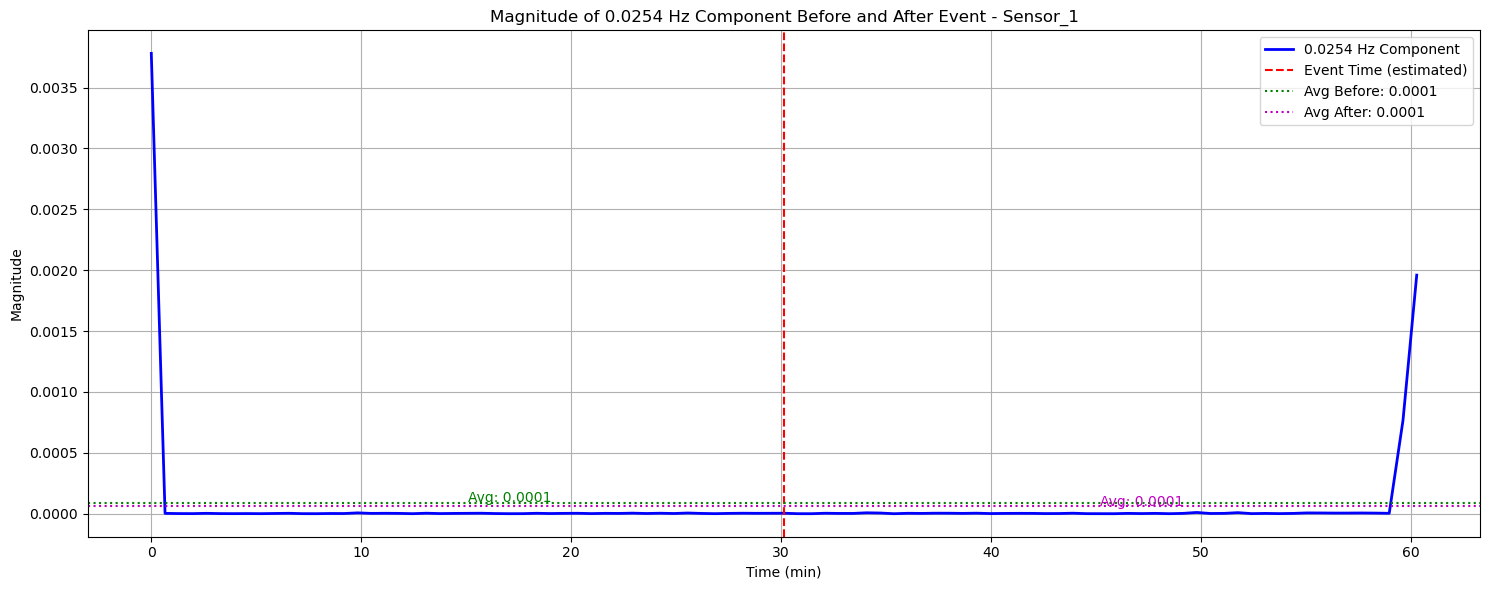


Energy Analysis:
Total energy before event: 0.0000
Total energy after event: 0.0000
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: -0.0000 (-69.69%)


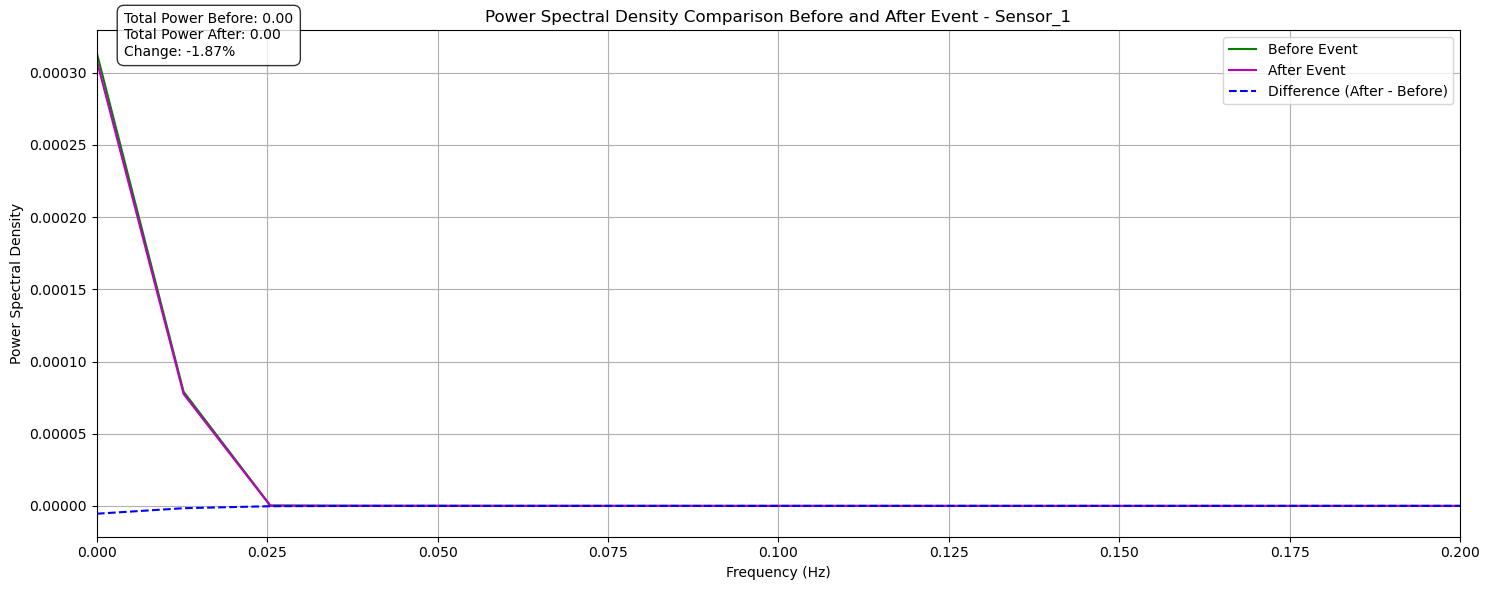


Power Spectral Density Analysis:
Total power before event: 0.0004
Total power after event: 0.0004
Absolute power change: -0.0000
Relative power change: -1.87%
Saved significant changes data to: significant_changes_csv_sound_simulation_csv\Sensor_1_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  3.134209e-04  3.080145e-04    -5.406367e-06       -1.724954
1     0.012722  7.906516e-05  7.746126e-05    -1.603900e-06       -2.028578
118   1.501176  1.063081e-10  5.792569e-11    -4.838239e-11      -23.451523
122   1.552063  1.056649e-10  5.651726e-11    -4.914761e-11      -23.896940
125   1.590228  1.066110e-10  5.720448e-11    -4.940652e-11      -23.912822

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
2    0.025444  3.106919e-07  9.622833e-08    -2.144636e-07      -69.005522
8    0.101775  1.130074e-

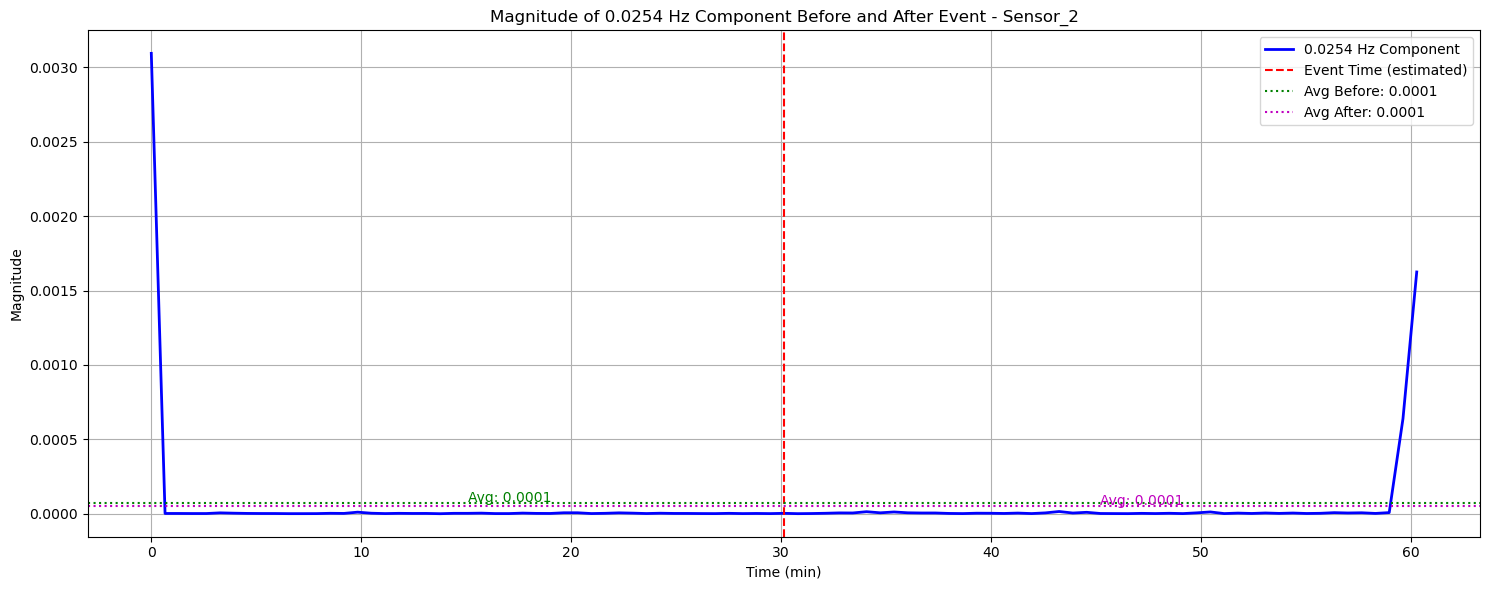


Energy Analysis:
Total energy before event: 0.0000
Total energy after event: 0.0000
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: -0.0000 (-68.83%)


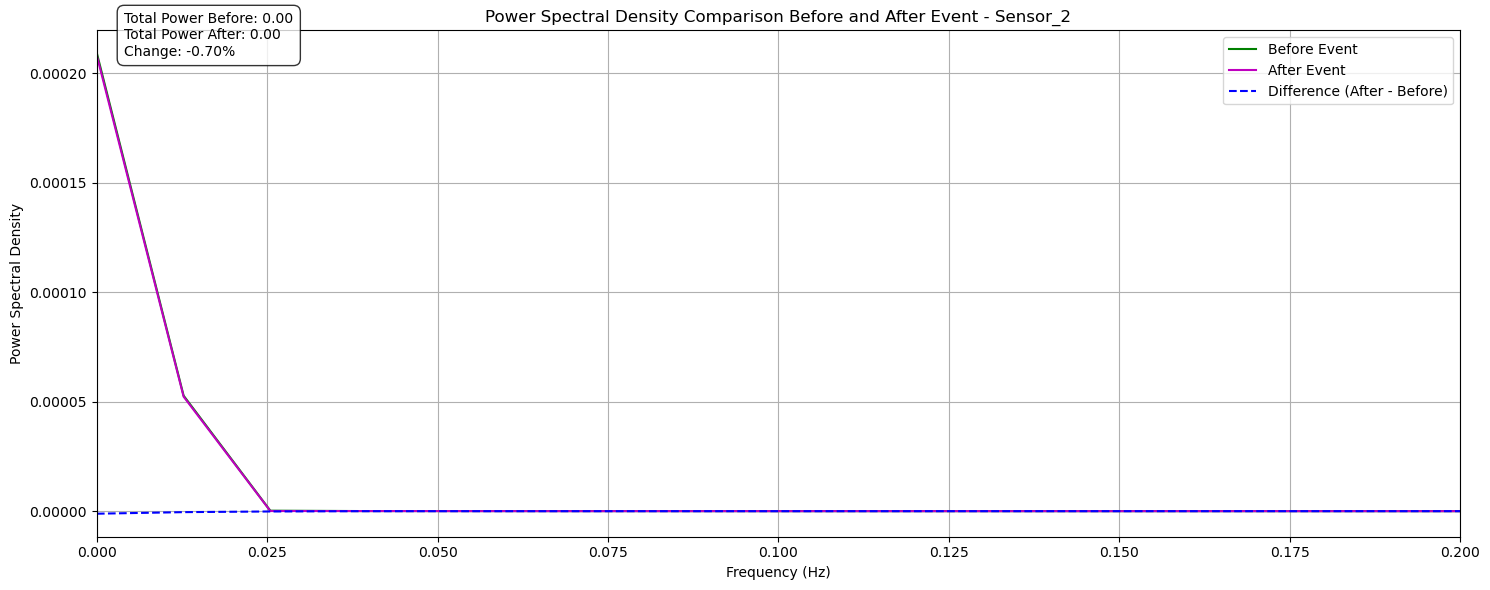


Power Spectral Density Analysis:
Total power before event: 0.0003
Total power after event: 0.0003
Absolute power change: -0.0000
Relative power change: -0.70%
Saved significant changes data to: significant_changes_csv_sound_simulation_csv\Sensor_2_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  2.091181e-04  2.079531e-04    -1.164980e-06       -0.557091
1     0.012722  5.275316e-05  5.230329e-05    -4.498669e-07       -0.852776
127   1.615672  7.046244e-11  4.056754e-11    -2.989490e-11      -17.537531
121   1.539341  7.020413e-11  3.979500e-11    -3.040913e-11      -17.866269
124   1.577507  7.096347e-11  3.976958e-11    -3.119389e-11      -18.245940

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
2    0.025444  2.081625e-07  6.629233e-08    -1.418702e-07      -68.120844
8    0.101775  7.574923e-

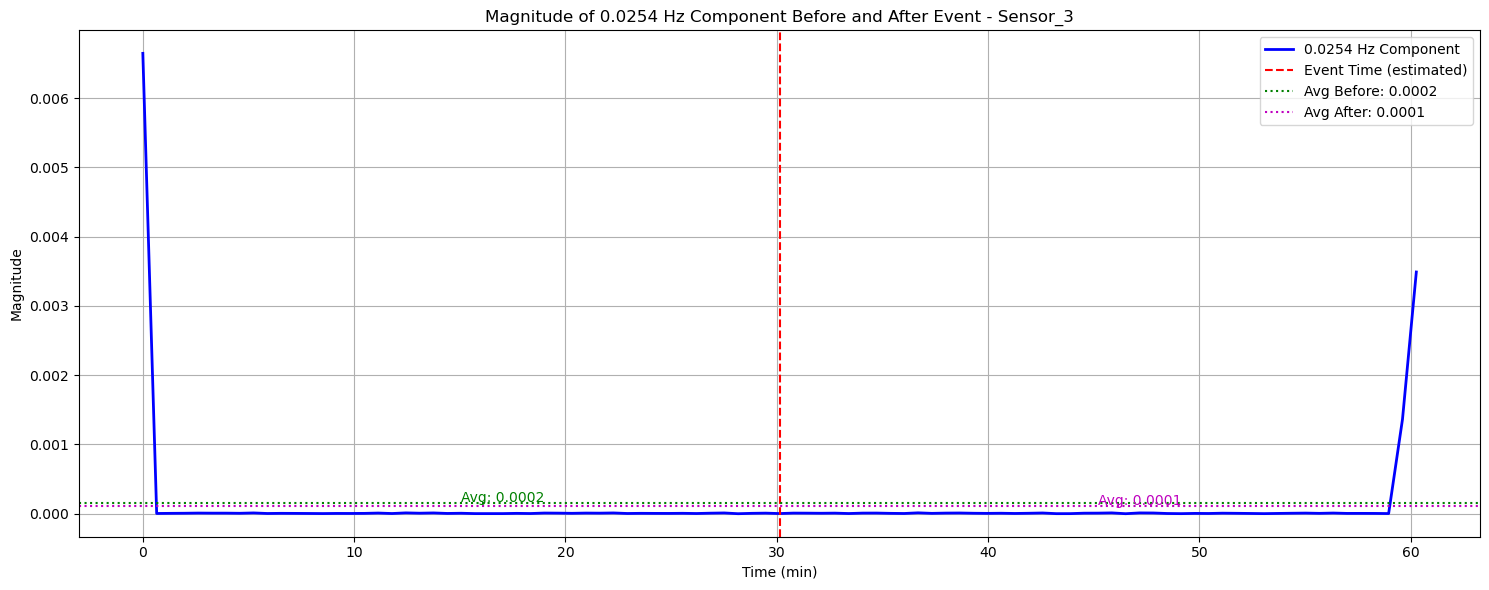


Energy Analysis:
Total energy before event: 0.0000
Total energy after event: 0.0000
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: -0.0000 (-68.90%)


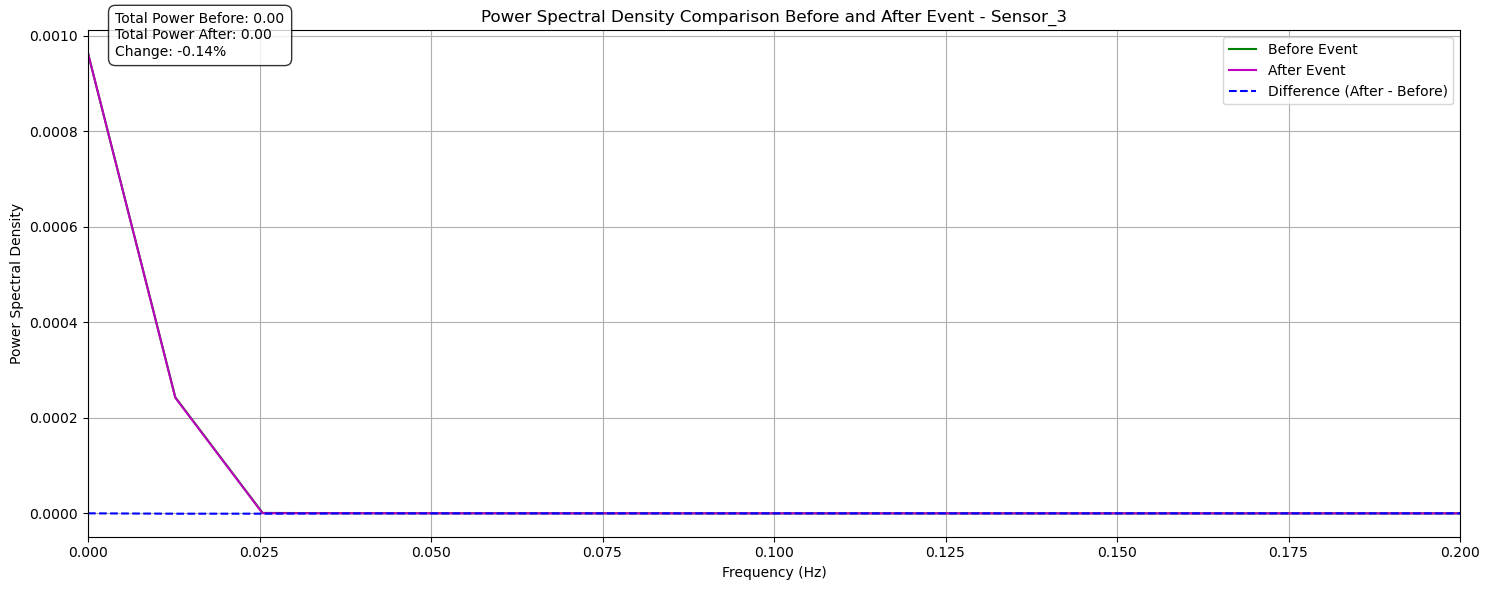


Power Spectral Density Analysis:
Total power before event: 0.0012
Total power after event: 0.0012
Absolute power change: -0.0000
Relative power change: -0.14%
Saved significant changes data to: significant_changes_csv_sound_simulation_csv\Sensor_3_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  9.625966e-04  9.626655e-04     6.882141e-08        0.007150
1     0.012722  2.428357e-04  2.421276e-04    -7.080870e-07       -0.291591
3     0.038165  2.397965e-07  1.654948e-07    -7.430166e-08      -30.972384
106   1.348514  3.464508e-10  1.932799e-10    -1.531709e-10      -34.308568
107   1.361236  3.443128e-10  1.909977e-10    -1.533151e-10      -34.506114

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
2    0.025444  9.600477e-07  3.050740e-07    -6.549736e-07      -68.215926
8    0.101775  3.491160e-

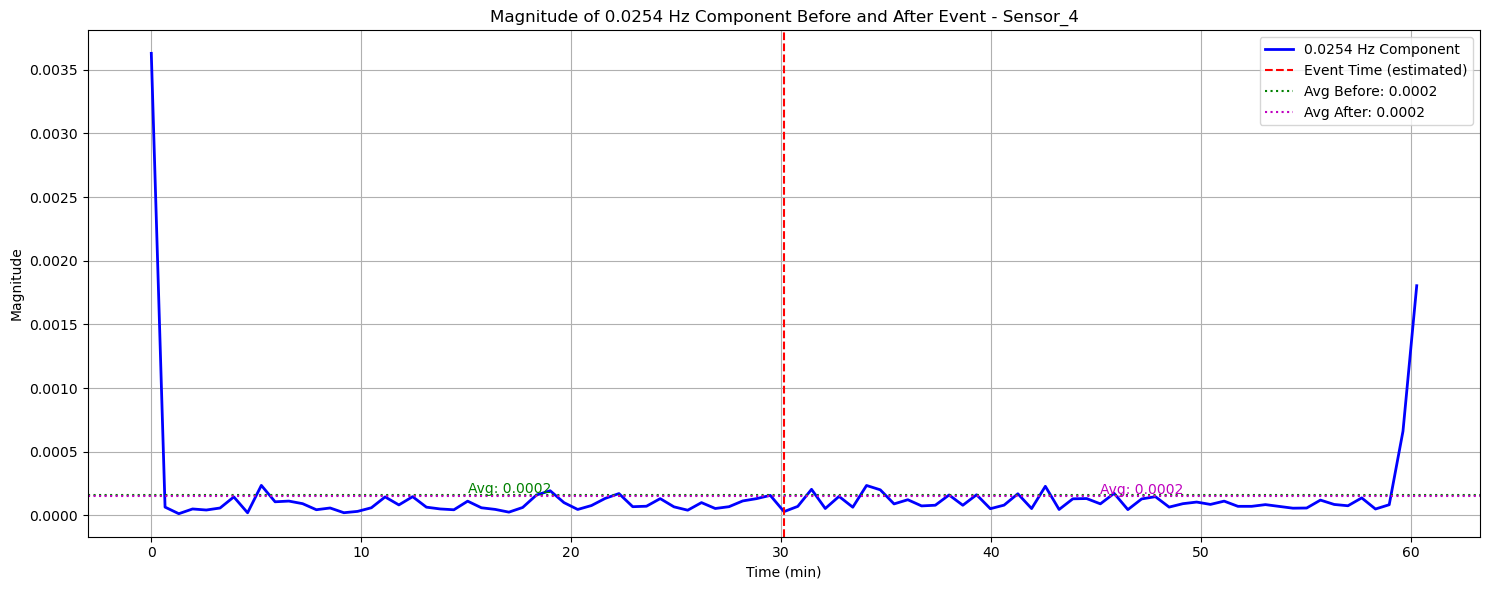


Energy Analysis:
Total energy before event: 0.0000
Total energy after event: 0.0000
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: -0.0000 (-69.18%)


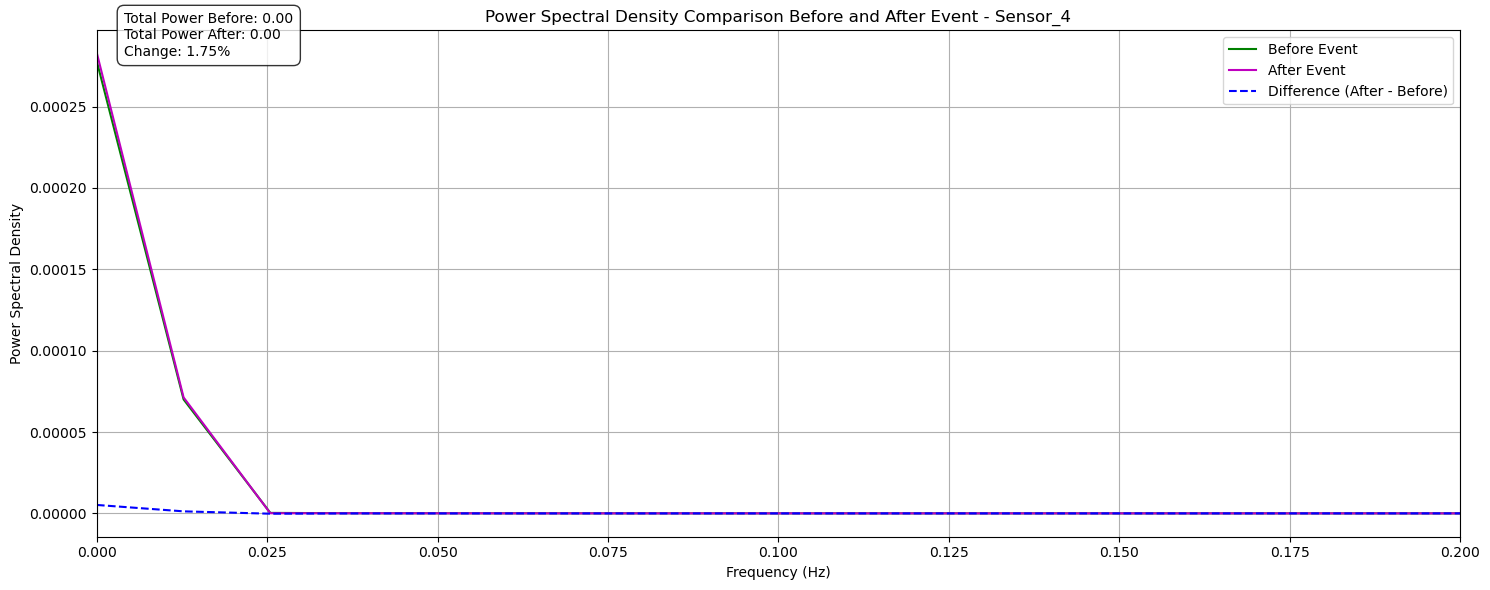


Power Spectral Density Analysis:
Total power before event: 0.0003
Total power after event: 0.0004
Absolute power change: 0.0000
Relative power change: 1.75%
Saved significant changes data to: significant_changes_csv_sound_simulation_csv\Sensor_4_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  2.775193e-04  2.826900e-04     5.170741e-06        1.863200
1     0.012722  6.999990e-05  7.124167e-05     1.241770e-06        1.773958
116   1.475732  9.870395e-11  5.132771e-11    -4.737623e-11      -23.842624
121   1.539341  9.698054e-11  4.938393e-11    -4.759661e-11      -24.163103
127   1.615672  9.610426e-11  4.868693e-11    -4.741733e-11      -24.179651

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
2    0.025444  2.959260e-07  9.316114e-08    -2.027648e-07      -68.495625
8    0.101775  1.041936e-08

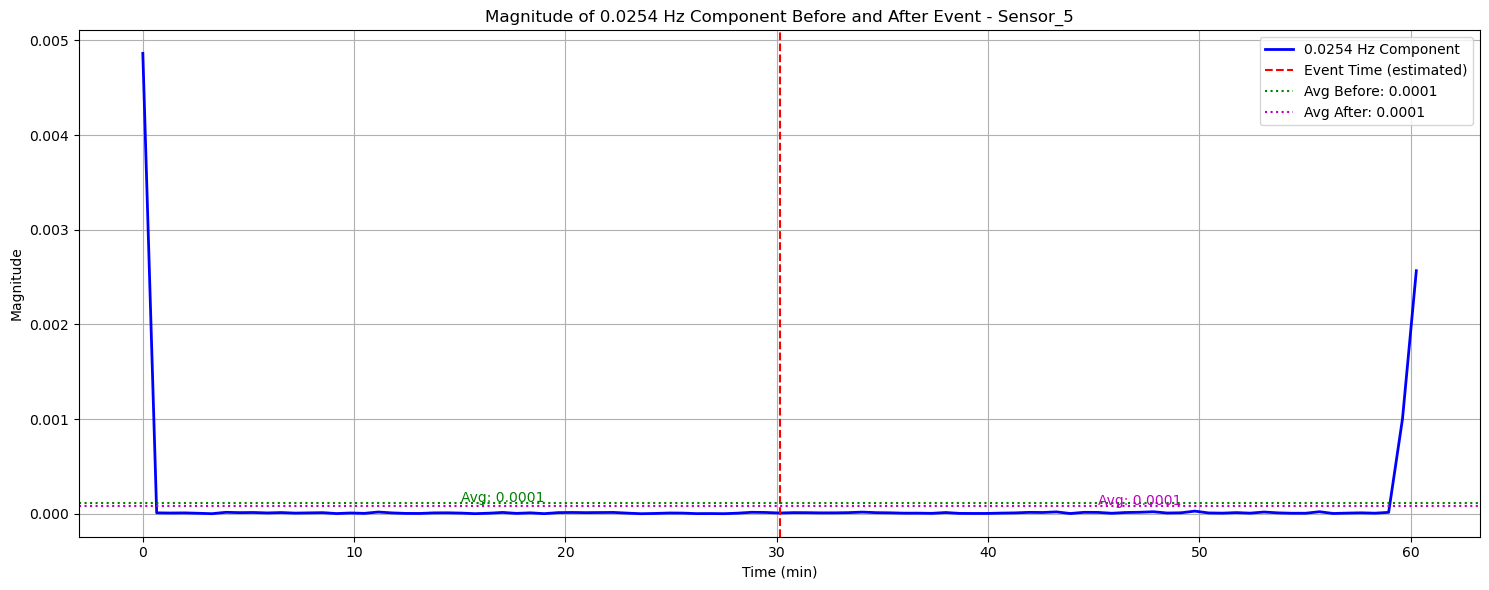


Energy Analysis:
Total energy before event: 0.0000
Total energy after event: 0.0000
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: -0.0000 (-68.55%)


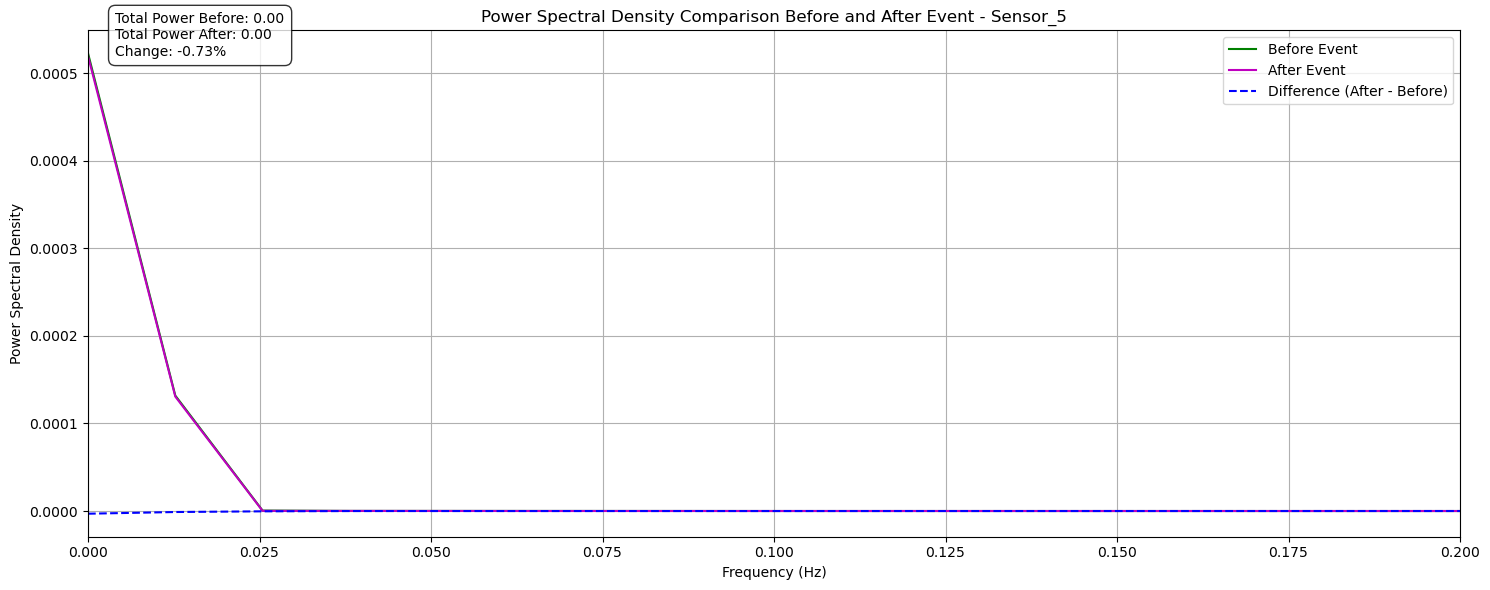


Power Spectral Density Analysis:
Total power before event: 0.0007
Total power after event: 0.0007
Absolute power change: -0.0000
Relative power change: -0.73%
Saved significant changes data to: significant_changes_csv_sound_simulation_csv\Sensor_5_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  5.229350e-04  5.198600e-04    -3.075041e-06       -0.588035
1     0.012722  1.318989e-04  1.307506e-04    -1.148377e-06       -0.870649
126   1.602950  1.717082e-10  9.683886e-11    -7.486931e-11      -27.555046
128   1.628394  1.715738e-10  9.649051e-11    -7.508329e-11      -27.647474
127   1.615672  1.715960e-10  9.632259e-11    -7.527339e-11      -27.715208

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
2    0.025444  5.141730e-07  1.652029e-07    -3.489701e-07      -67.856976
8    0.101775  1.875464e-

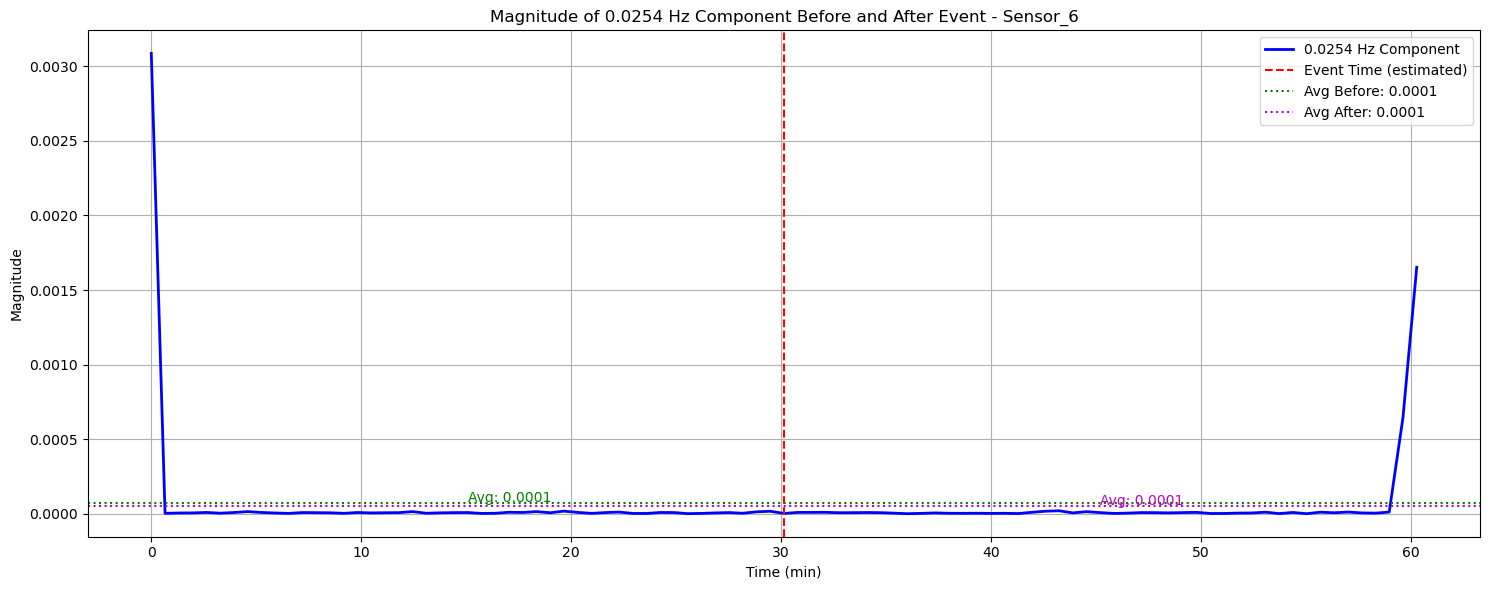


Energy Analysis:
Total energy before event: 0.0000
Total energy after event: 0.0000
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: -0.0000 (-67.61%)


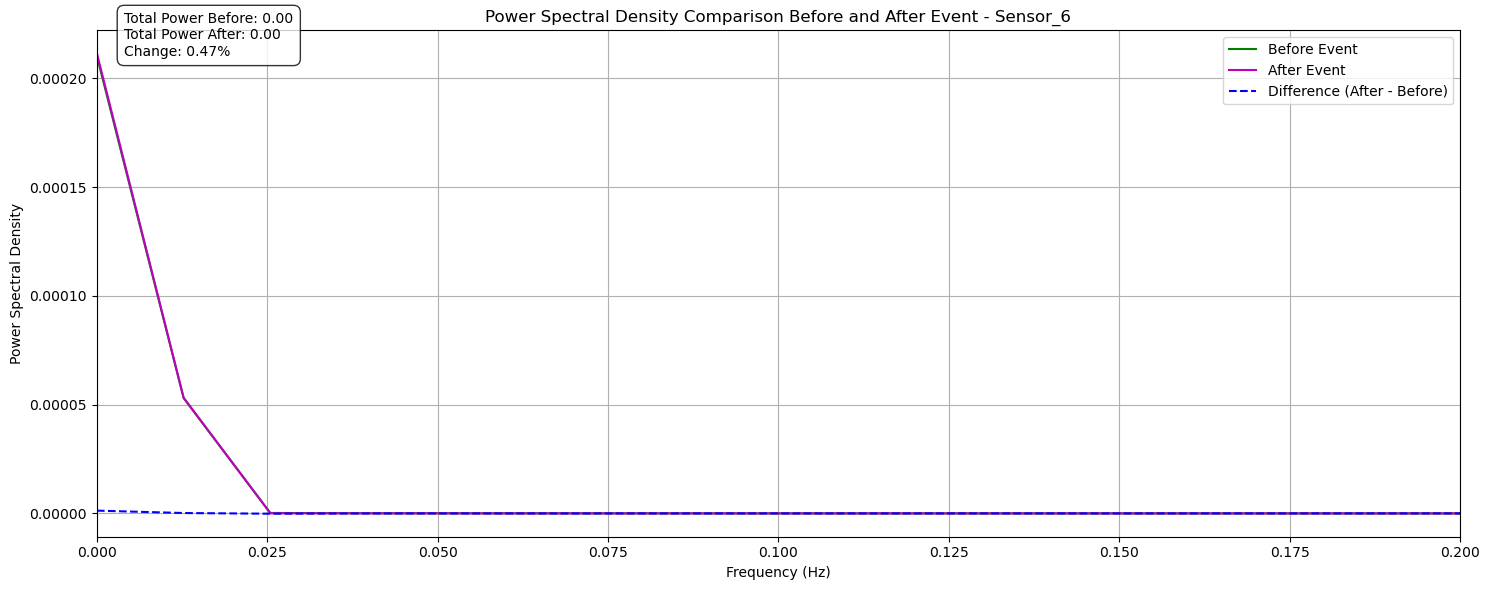


Power Spectral Density Analysis:
Total power before event: 0.0003
Total power after event: 0.0003
Absolute power change: 0.0000
Relative power change: 0.47%
Saved significant changes data to: significant_changes_csv_sound_simulation_csv\Sensor_6_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  2.102567e-04  2.115316e-04     1.274916e-06        0.606361
1     0.012722  5.303390e-05  5.320690e-05     1.729932e-07        0.326193
128   1.628394  6.918215e-11  4.198508e-11    -2.719707e-11      -16.075614
121   1.539341  7.084876e-11  4.144272e-11    -2.940604e-11      -17.211738
109   1.386679  7.330114e-11  4.324397e-11    -3.005717e-11      -17.343897

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
2    0.025444  2.069692e-07  6.848555e-08    -1.384836e-07      -66.877951
8    0.101775  7.547309e-09

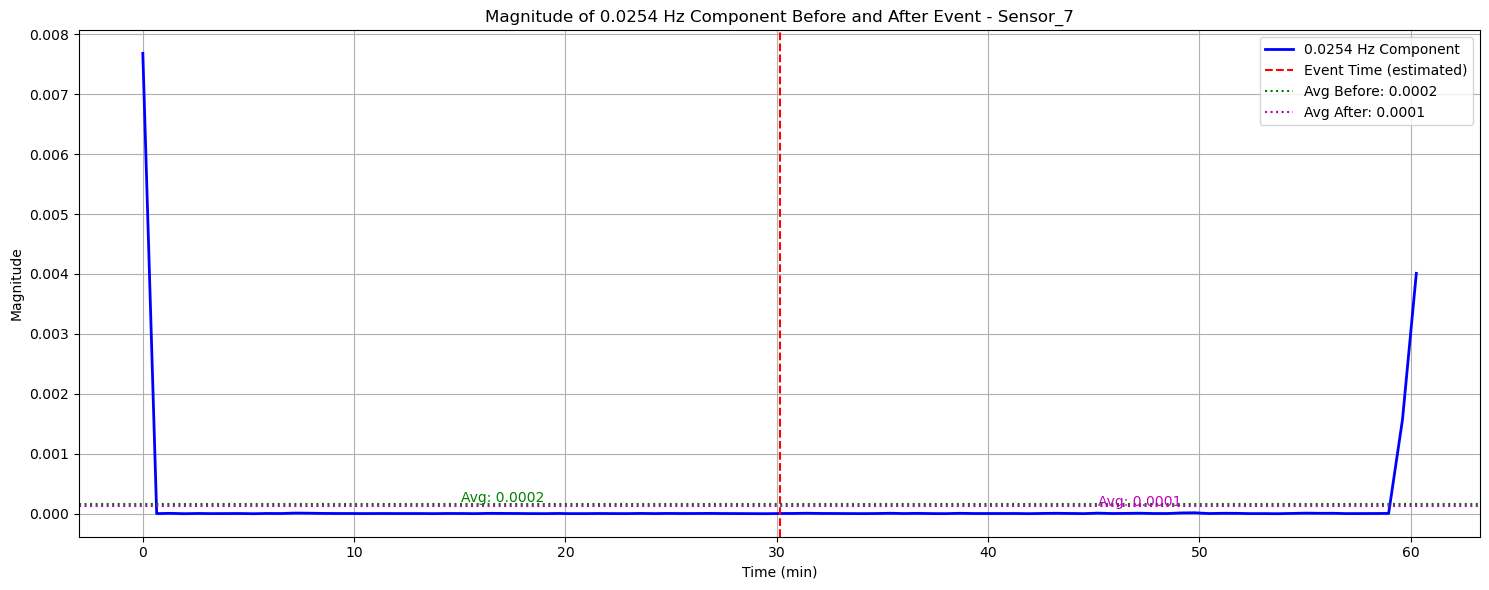


Energy Analysis:
Total energy before event: 0.0001
Total energy after event: 0.0000
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: -0.0000 (-69.22%)


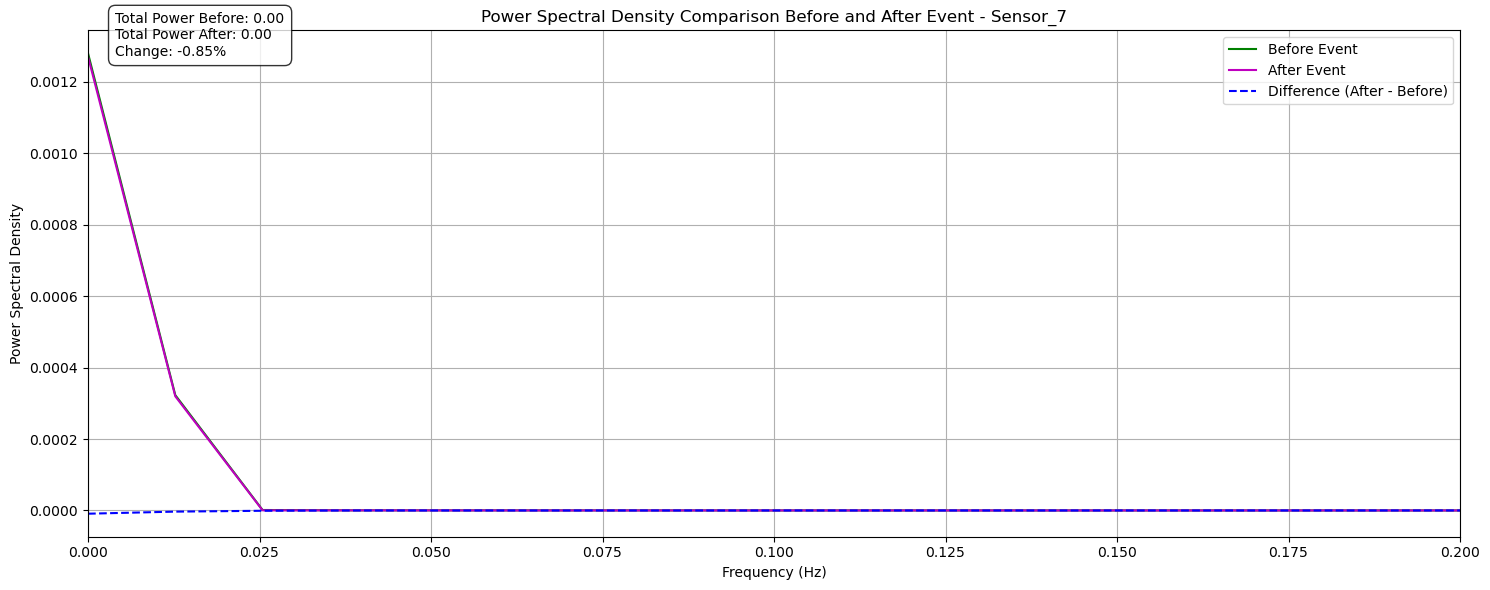


Power Spectral Density Analysis:
Total power before event: 0.0016
Total power after event: 0.0016
Absolute power change: -0.0000
Relative power change: -0.85%
Saved significant changes data to: significant_changes_csv_sound_simulation_csv\Sensor_7_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  1.279740e-03  1.270656e-03    -9.084105e-06       -0.709840
1     0.012722  3.228423e-04  3.195941e-04    -3.248118e-06       -1.006100
3     0.038165  3.205427e-07  2.188058e-07    -1.017369e-07      -31.729062
123   1.564785  4.304032e-10  2.362516e-10    -1.941516e-10      -36.604528
124   1.577507  4.312959e-10  2.360905e-10    -1.952054e-10      -36.741378

Top 5 frequencies with largest power decrease:
    Frequency        Before         After  Absolute_Change  Percent_Change
2    0.025444  1.282289e-06  4.032760e-07    -8.790130e-07      -68.544956
8    0.101775  4.665559e-

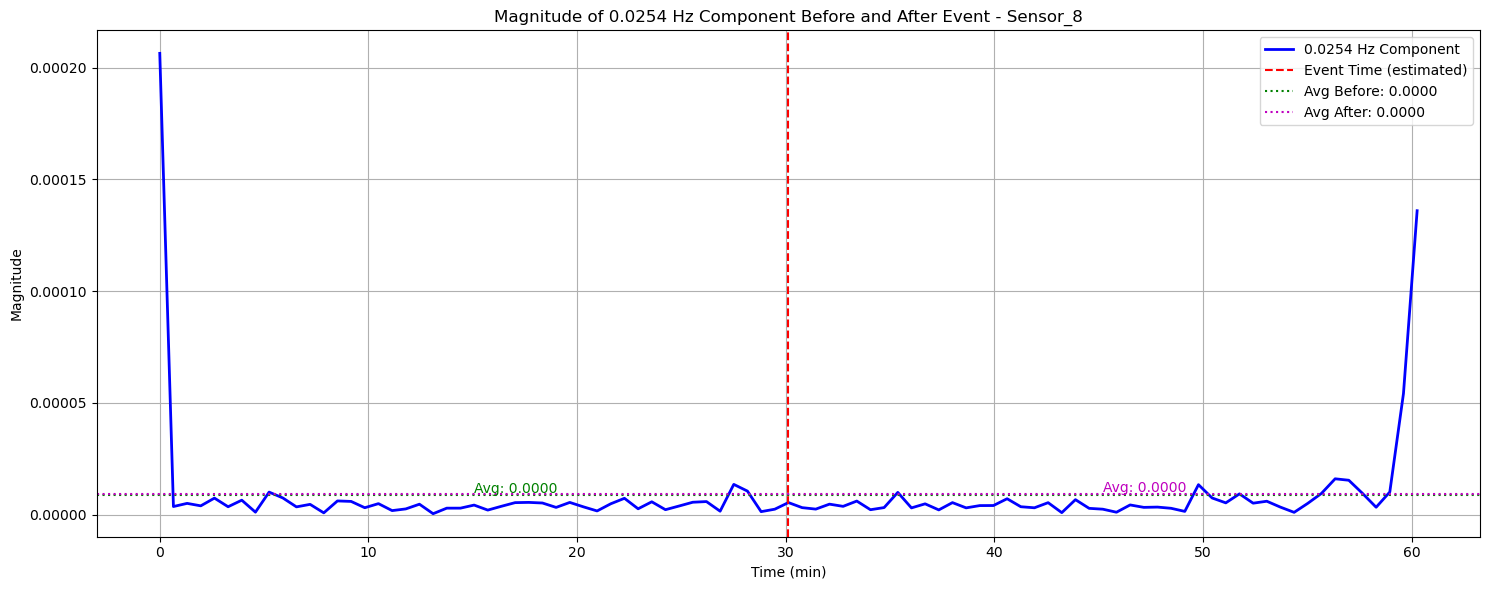


Energy Analysis:
Total energy before event: 0.0000
Total energy after event: 0.0000
Average energy before event: 0.0000
Average energy after event: 0.0000
Energy change: -0.0000 (-48.08%)


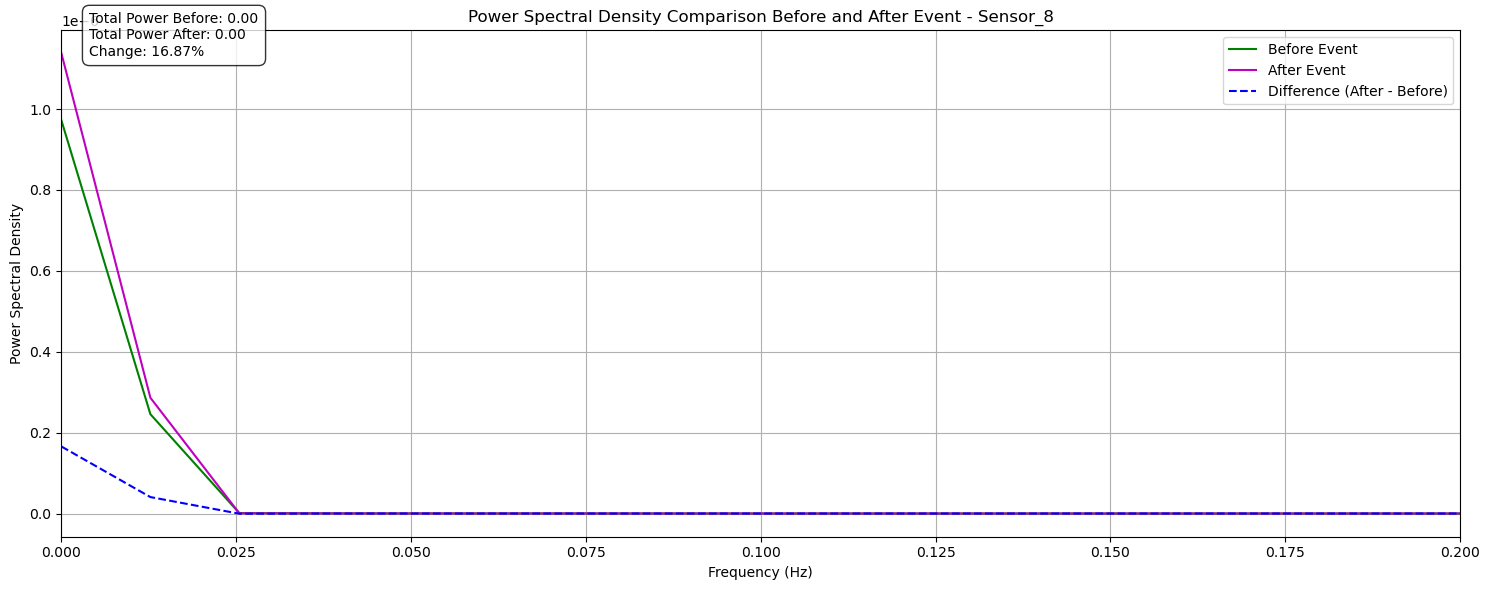


Power Spectral Density Analysis:
Total power before event: 0.0000
Total power after event: 0.0000
Absolute power change: 0.0000
Relative power change: 16.87%
Saved significant changes data to: significant_changes_csv_sound_simulation_csv\Sensor_8_significant_changes.csv

Top 5 frequencies with largest power increase:
     Frequency        Before         After  Absolute_Change  Percent_Change
0     0.000000  9.721147e-07  1.137815e-06     1.657004e-07       17.043605
1     0.012722  2.456653e-07  2.863562e-07     4.069091e-08       16.556813
104   1.323070  8.132888e-13  1.110712e-12     2.974232e-13        0.295024
41    0.521595  1.681789e-12  1.942721e-12     2.609314e-13        0.256616
52    0.661535  1.284012e-12  1.497103e-12     2.130910e-13        0.210390

Top 5 frequencies with largest power decrease:
   Frequency        Before         After  Absolute_Change  Percent_Change
2   0.025444  9.523768e-10  5.045695e-10    -4.478073e-10      -42.551992
4   0.050887  1.678741e-10  

In [9]:
# Analyze the 0.02Hz frequency band before and after event for each sensor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

# Get dataset name from the notebook filename
notebook_name = os.path.basename(__file__) if '__file__' in globals() else 'sound_simulation_csv'
if notebook_name.endswith('.ipynb'):
    notebook_name = notebook_name[:-6]  # Remove .ipynb extension
if notebook_name.startswith('da_'):
    notebook_name = notebook_name[3:]  # Remove da_ prefix

# Create a directory to save CSV files with dataset name
csv_dir = f"significant_changes_csv_{notebook_name}"
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)
    print(f"Created directory: {csv_dir}")

# Calculate sampling frequency
sampling_freq = 1.0 / data['Timestamp'].diff().median()

# Find the event time (assuming it's at the center of the filtered data)
event_time = window_data['Timestamp'].mean()

# Loop through each voltage channel
for channel_to_analyze in voltage_columns:
    print(f"\n=== Analysis for {channel_to_analyze} ===")
    voltage_data = window_data[channel_to_analyze].values
    
    # Perform STFT for the selected channel
    f, t, Zxx = signal.stft(voltage_data, fs=sampling_freq, nperseg=256)
    
    # Find the closest frequency to 0.02Hz in the STFT results
    target_freq = 0.02
    freq_idx = np.argmin(np.abs(f - target_freq))
    actual_freq = f[freq_idx]
    print(f"Analyzing frequency: {actual_freq:.4f} Hz (closest to 0.02 Hz)")
    
    # Extract the magnitude data for this frequency
    freq_magnitude = np.abs(Zxx[freq_idx, :])
    
    # Create a time axis in minutes for better visualization
    time_min = t / 60
    
    # Plot the magnitude of the 0.02Hz component over time
    plt.figure(figsize=(15, 6))
    
    # Plot the magnitude
    plt.plot(time_min, freq_magnitude, 'b-', linewidth=2, label=f'{actual_freq:.4f} Hz Component')
    
    # Convert event time to minutes
    event_time_min = t.mean() / 60
    plt.axvline(x=event_time_min, color='r', linestyle='--', label='Event Time (estimated)')
    
    # Calculate average magnitude before and after event
    before_mask = t < t.mean()
    after_mask = t >= t.mean()
    
    avg_before = np.mean(freq_magnitude[before_mask])
    avg_after = np.mean(freq_magnitude[after_mask])
    
    print(f"Average magnitude before event: {avg_before:.4f}")
    print(f"Average magnitude after event: {avg_after:.4f}")
    print(f"Change: {(avg_after - avg_before):.4f} ({(avg_after - avg_before)/avg_before*100:.2f}%)")
    
    # Add horizontal lines showing the average values
    plt.axhline(y=avg_before, color='g', linestyle=':', label=f'Avg Before: {avg_before:.4f}')
    plt.axhline(y=avg_after, color='m', linestyle=':', label=f'Avg After: {avg_after:.4f}')
    
    # Add annotations
    plt.annotate(f"Avg: {avg_before:.4f}", xy=(time_min[len(time_min)//4], avg_before), 
                 xytext=(time_min[len(time_min)//4], avg_before*1.1), color='g')
    plt.annotate(f"Avg: {avg_after:.4f}", xy=(time_min[3*len(time_min)//4], avg_after), 
                 xytext=(time_min[3*len(time_min)//4], avg_after*1.1), color='m')
    
    # Set axis labels and title
    plt.xlabel('Time (min)')
    plt.ylabel('Magnitude')
    plt.title(f'Magnitude of {actual_freq:.4f} Hz Component Before and After Event - {channel_to_analyze}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Calculate energy (integral of magnitude squared) before and after event
    energy_before = np.sum(freq_magnitude[before_mask]**2)
    energy_after = np.sum(freq_magnitude[after_mask]**2)
    
    # Normalize by the number of samples to get average energy
    num_samples_before = np.sum(before_mask)
    num_samples_after = np.sum(after_mask)
    avg_energy_before = energy_before / num_samples_before
    avg_energy_after = energy_after / num_samples_after
    
    print("\nEnergy Analysis:")
    print(f"Total energy before event: {energy_before:.4f}")
    print(f"Total energy after event: {energy_after:.4f}")
    print(f"Average energy before event: {avg_energy_before:.4f}")
    print(f"Average energy after event: {avg_energy_after:.4f}")
    print(f"Energy change: {(avg_energy_after - avg_energy_before):.4f} ({(avg_energy_after - avg_energy_before)/avg_energy_before*100:.2f}%)")
    
    # Power Spectral Density (PSD) Analysis
    # Calculate power (magnitude squared)
    power_matrix = np.abs(Zxx) ** 2
    
    # Convert time to minutes for consistency with previous plots
    time_min = t / 60
    
    # Define the event time point (assuming same as before)
    event_time_min = time_min[len(time_min) // 2]  # Middle point as event time
    
    # Create masks for before and after event
    before_mask_time = time_min < event_time_min
    after_mask_time = time_min > event_time_min
    
    # Calculate average PSD before and after event
    avg_psd_before = np.mean(power_matrix[:, before_mask_time], axis=1)
    avg_psd_after = np.mean(power_matrix[:, after_mask_time], axis=1)
    
    # Plot the power spectral density comparison
    plt.figure(figsize=(15, 6))
    plt.plot(f, avg_psd_before, 'g-', label='Before Event')
    plt.plot(f, avg_psd_after, 'm-', label='After Event')
    
    # Calculate and display the difference
    psd_diff = avg_psd_after - avg_psd_before
    plt.plot(f, psd_diff, 'b--', label='Difference (After - Before)')
    
    # Set axis labels and title
    plt.xlabel('Frequency (Hz)')
    plt.xlim(0, 0.2)  # Limit x-axis to show only frequencies below 0.2 Hz
    plt.ylabel('Power Spectral Density')
    plt.title(f'Power Spectral Density Comparison Before and After Event - {channel_to_analyze}')
    plt.grid(True)
    plt.legend()
    
    # Add text box with summary statistics
    total_power_before = np.sum(avg_psd_before)
    total_power_after = np.sum(avg_psd_after)
    power_change = (total_power_after - total_power_before) / total_power_before * 100
    
    stats_text = f"Total Power Before: {total_power_before:.2f}\n"
    stats_text += f"Total Power After: {total_power_after:.2f}\n"
    stats_text += f"Change: {power_change:.2f}%"
    
    plt.annotate(stats_text, xy=(0.02, 0.95), xycoords='axes fraction',
                 bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\nPower Spectral Density Analysis:")
    print(f"Total power before event: {total_power_before:.4f}")
    print(f"Total power after event: {total_power_after:.4f}")
    print(f"Absolute power change: {total_power_after - total_power_before:.4f}")
    print(f"Relative power change: {power_change:.2f}%")
    
    # Find frequency bands with the most significant changes
    freq_change_percent = (avg_psd_after - avg_psd_before) / (avg_psd_before + 1e-10) * 100  # Avoid division by zero
    significant_changes = pd.DataFrame({
        'Frequency': f,
        'Before': avg_psd_before,
        'After': avg_psd_after,
        'Absolute_Change': avg_psd_after - avg_psd_before,
        'Percent_Change': freq_change_percent
    })
    
    # Save the significant_changes DataFrame to CSV
    csv_filename = os.path.join(csv_dir, f"{channel_to_analyze}_significant_changes.csv")
    significant_changes.to_csv(csv_filename, index=False)
    print(f"Saved significant changes data to: {csv_filename}")
    
    # Display top 5 frequencies with largest increase and decrease
    print("\nTop 5 frequencies with largest power increase:")
    print(significant_changes.sort_values('Percent_Change', ascending=False).head(5))
    
    print("\nTop 5 frequencies with largest power decrease:")
    print(significant_changes.sort_values('Percent_Change', ascending=True).head(5))



Analyzing significant changes across all sensors...


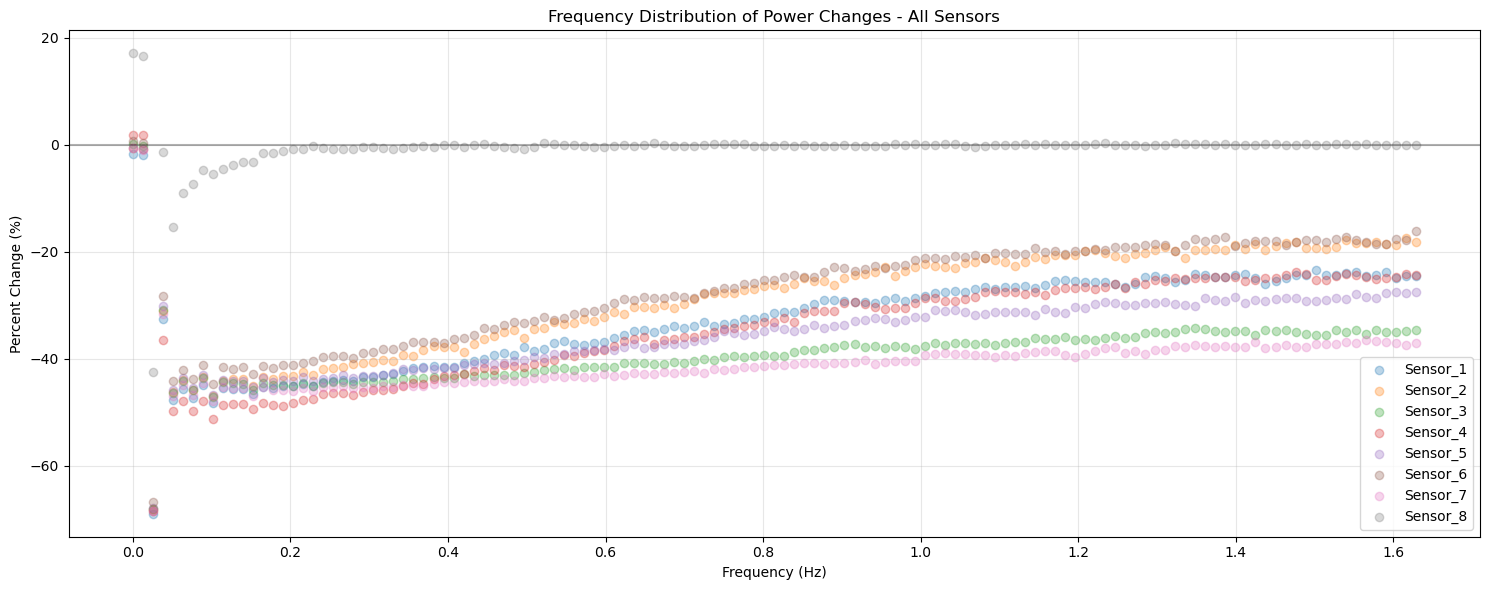


Analyzing patterns in top increases and decreases...


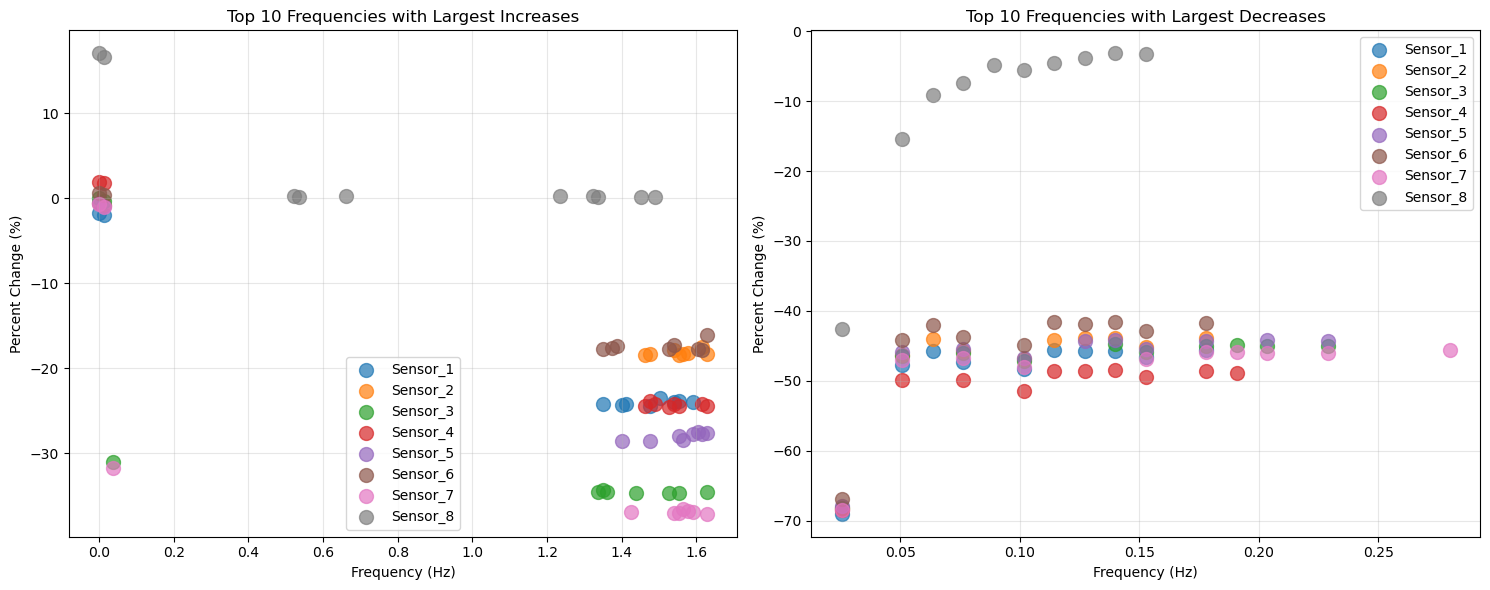


Analyzing frequency overlap between sensors...
Common frequencies showing increases across all sensors: [0.0, 0.0127218279707093, 1.5266193564851254]
Common frequencies showing decreases across all sensors: [0.0254436559414187, 0.0508873118828375, 0.0763309678242562, 0.101774623765675, 0.1144964517363844, 0.1272182797070937, 0.1399401076778031, 0.1526619356485125, 0.1653837636192219, 0.1781055915899312, 0.1908274195606406, 0.20354924753135, 0.2162710755020594]


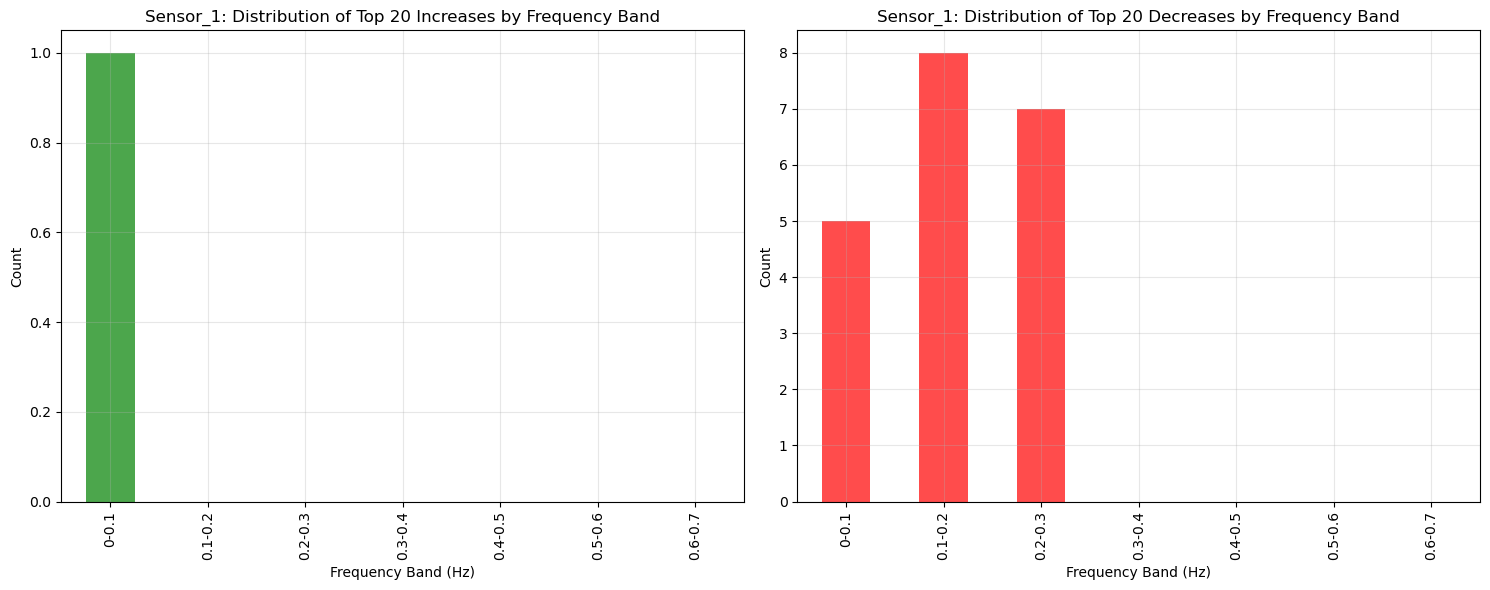

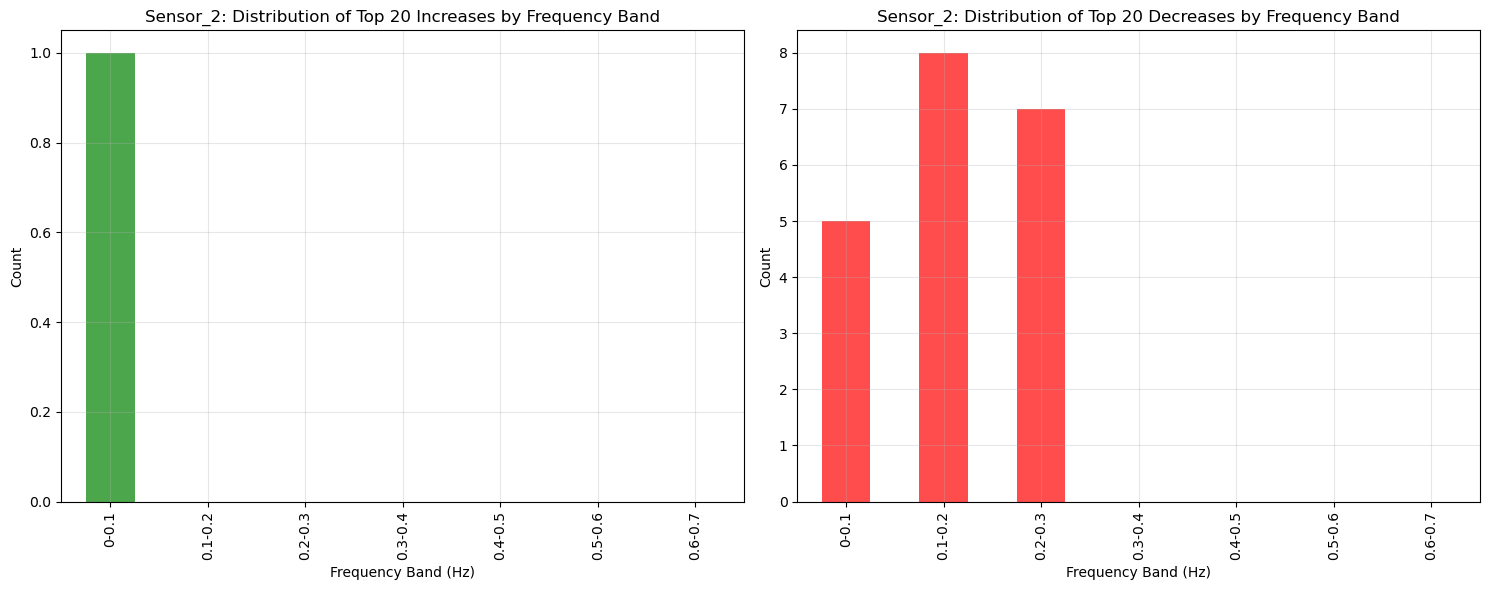

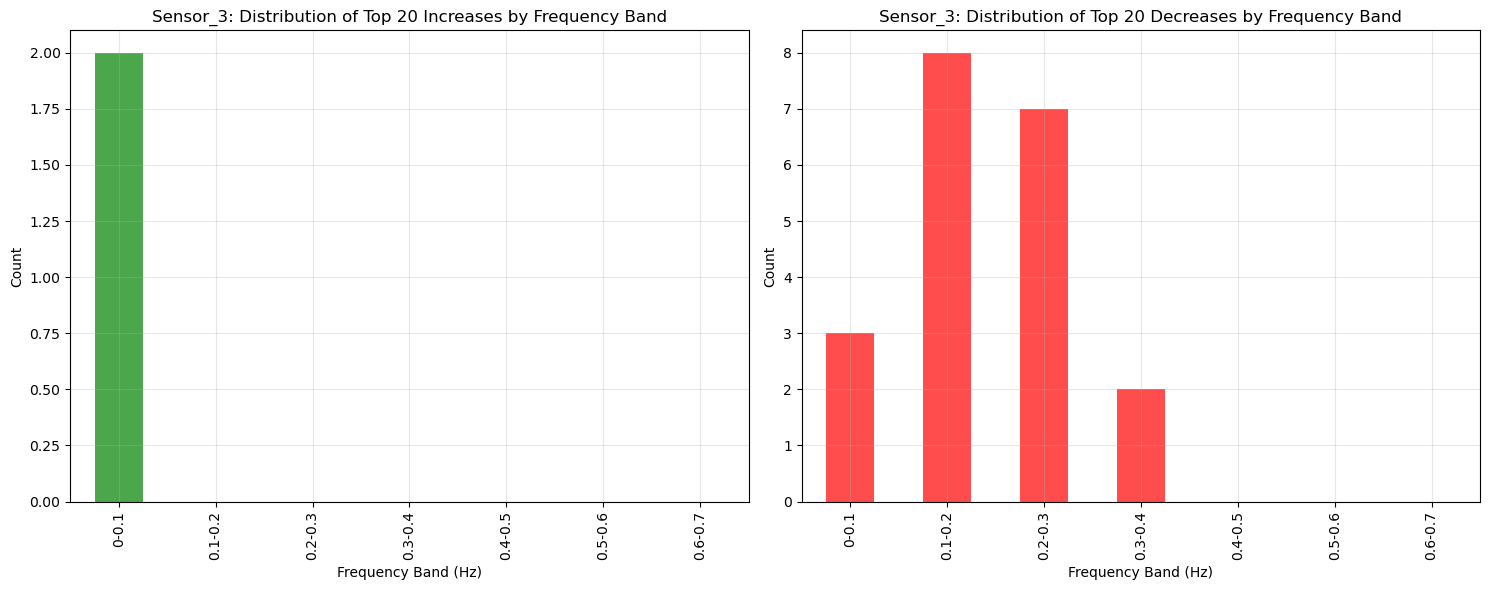

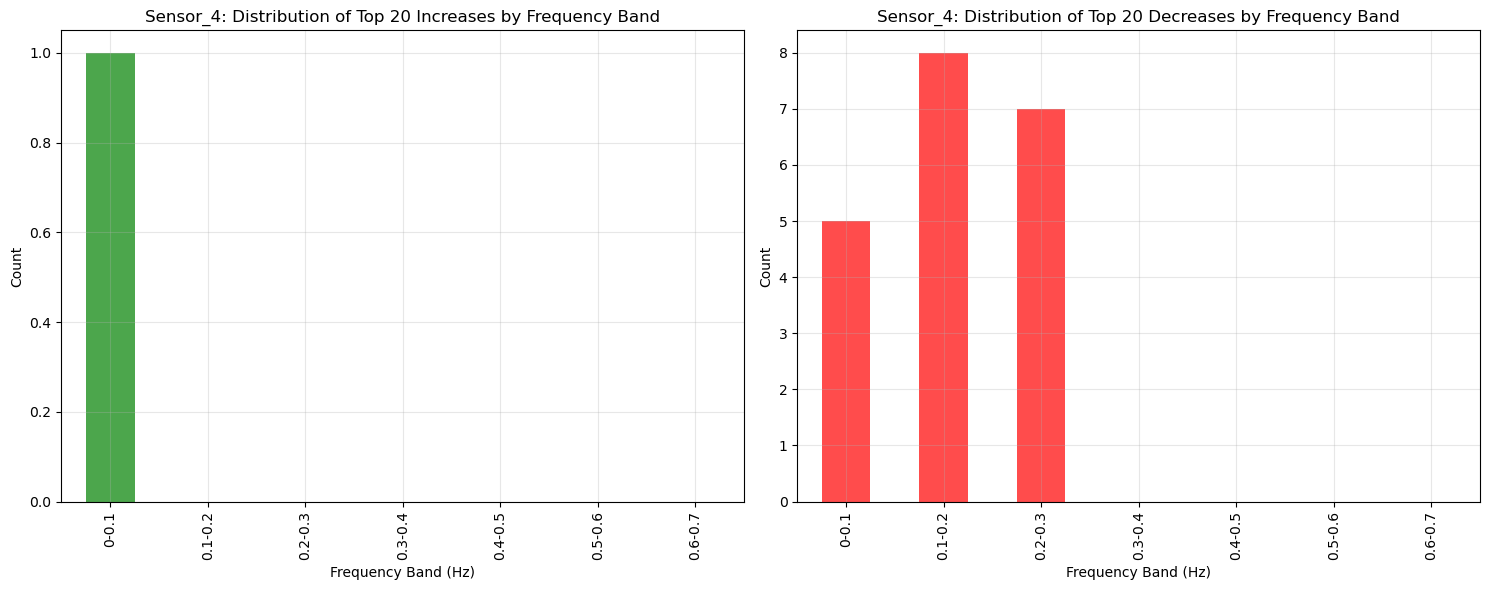

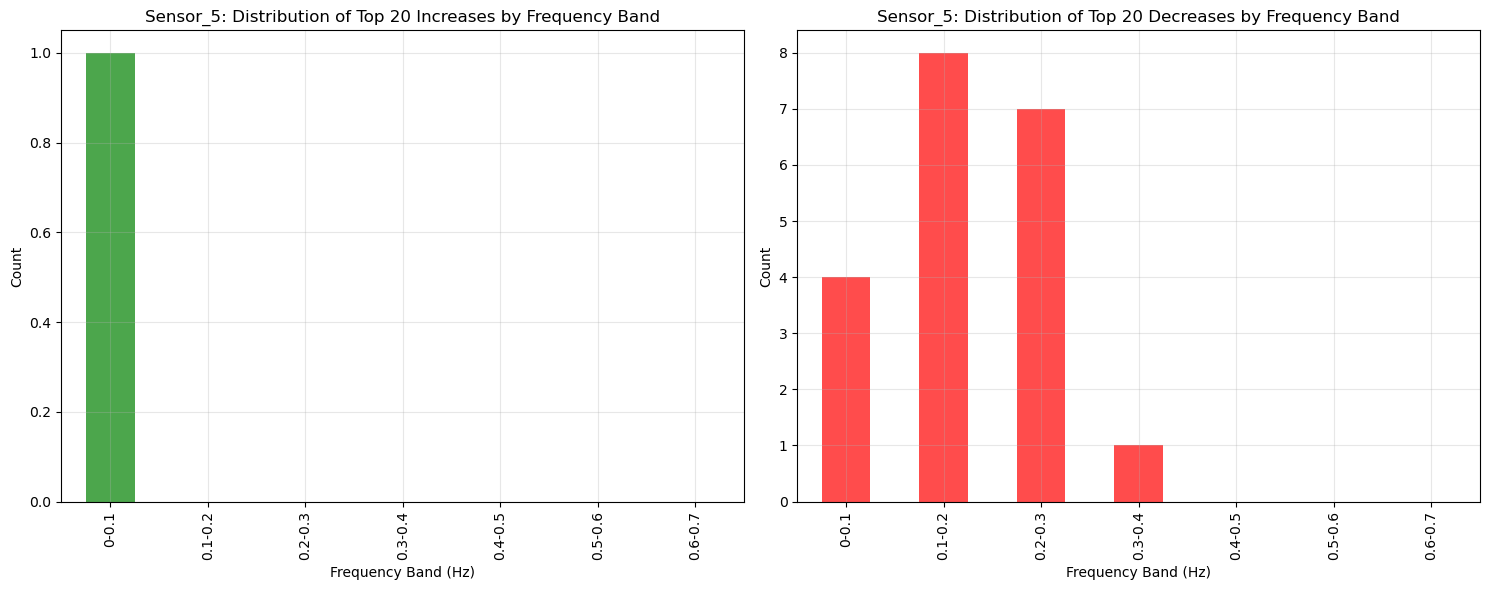

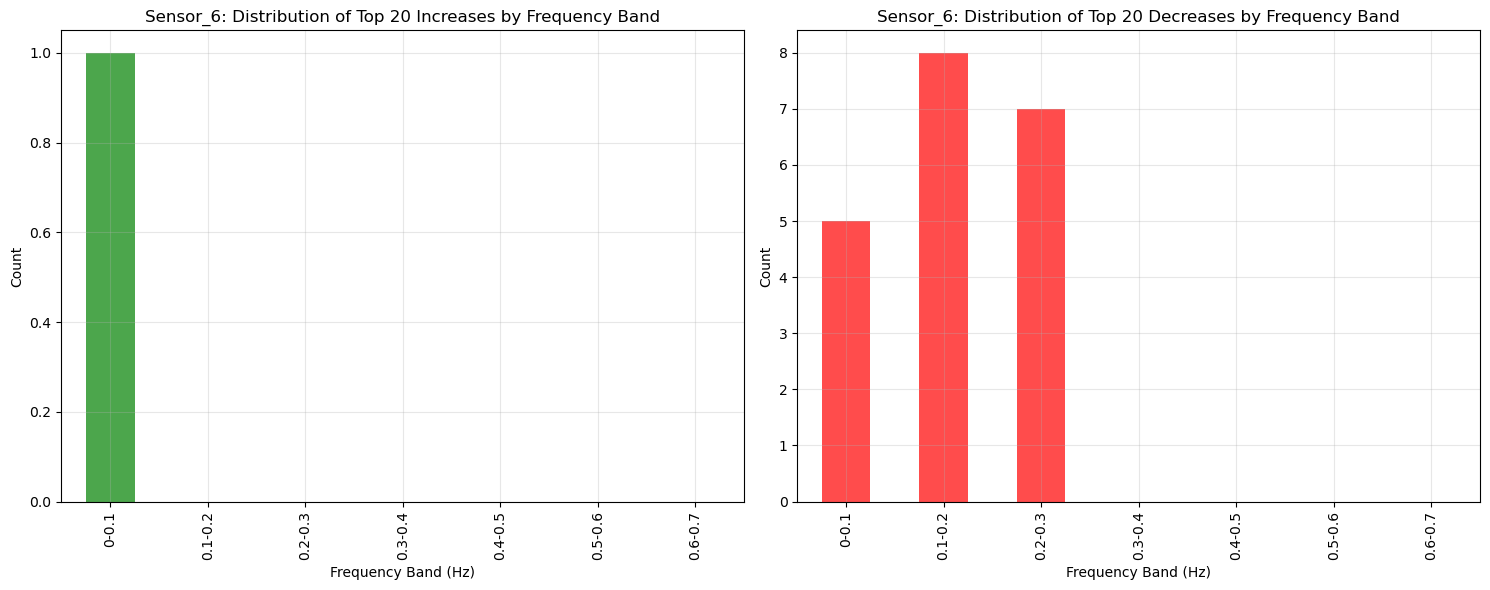

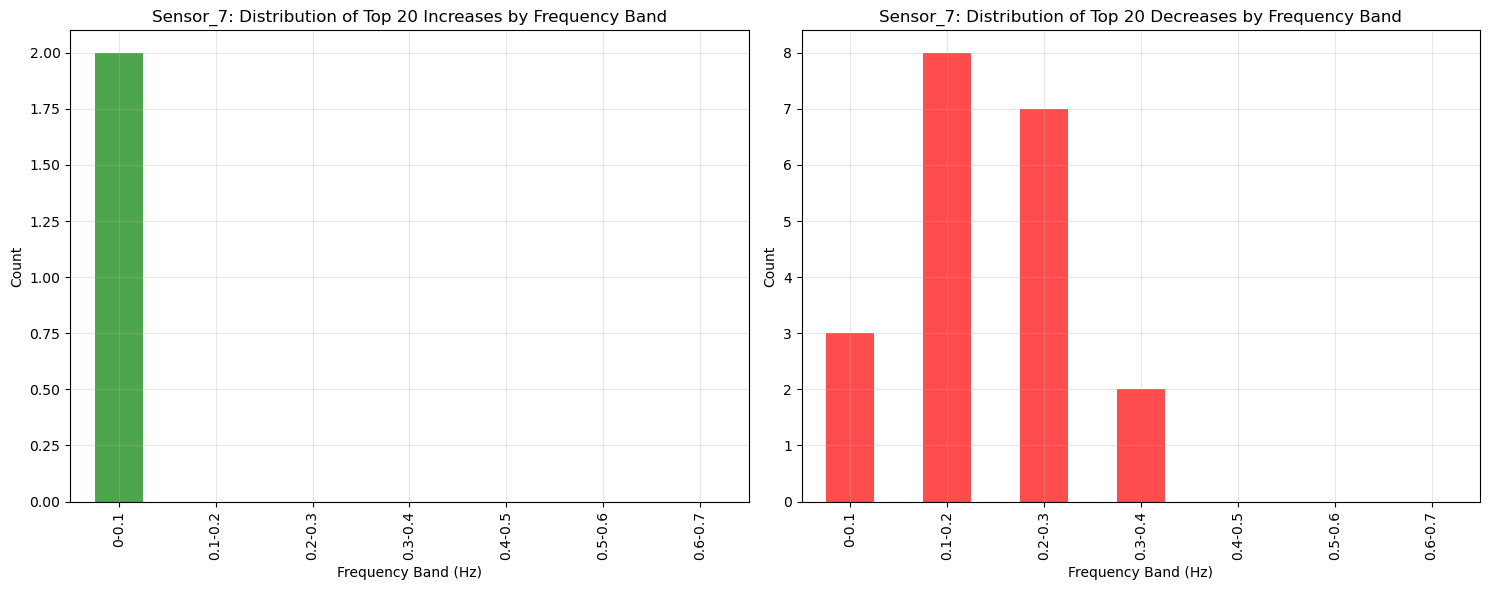

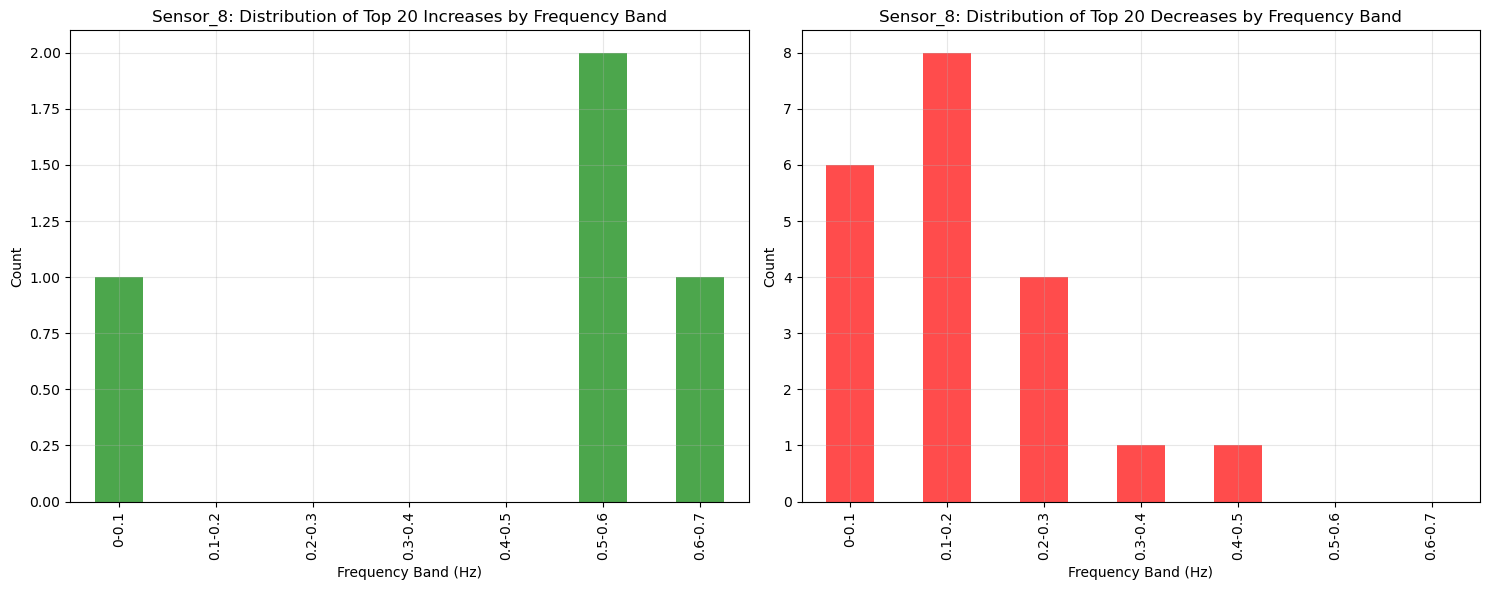

In [10]:
import seaborn as sns

# Analyze significant changes across all sensors
print("\nAnalyzing significant changes across all sensors...")

# Define the directory containing the CSV files
csv_dir_path = "significant_changes_csv_sound_simulation_csv"

# Get all CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir_path) if f.endswith('_significant_changes.csv')]

# Initialize lists to store summary data
sensor_names = []
top_increase_freqs = []
top_decrease_freqs = []
all_sensor_data = {}

# Create a figure for comparing all sensors
plt.figure(figsize=(15, 6))

# Process each sensor's data
for csv_file in csv_files:
    # Extract sensor name from filename
    sensor_name = csv_file.split('_significant_changes.csv')[0]
    sensor_names.append(sensor_name)
    
    # Load the CSV data
    csv_path = os.path.join(csv_dir_path, csv_file)
    sensor_data = pd.read_csv(csv_path)
    all_sensor_data[sensor_name] = sensor_data
    
    # Sort by absolute percent change
    sensor_data['Abs_Percent_Change'] = np.abs(sensor_data['Percent_Change'])
    
    # Get top increases and decreases
    top_increases = sensor_data.sort_values('Percent_Change', ascending=False).head(20)
    top_increase_freqs.append(top_increases['Frequency'].tolist())
    
    top_decreases = sensor_data.sort_values('Percent_Change', ascending=True).head(20)
    top_decrease_freqs.append(top_decreases['Frequency'].tolist())
    
    # Plot frequency vs percent change for this sensor
    plt.scatter(sensor_data['Frequency'], sensor_data['Percent_Change'], 
                alpha=0.3, label=sensor_name)

# Add plot details
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Percent Change (%)')
plt.title('Frequency Distribution of Power Changes - All Sensors')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze patterns in top increases and decreases
print("\nAnalyzing patterns in top increases and decreases...")

# Create figures for top increases and decreases
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
for i, sensor_name in enumerate(sensor_names):
    sensor_data = all_sensor_data[sensor_name]
    top_increases = sensor_data.sort_values('Percent_Change', ascending=False).head(10)
    plt.scatter(top_increases['Frequency'], top_increases['Percent_Change'], 
                label=sensor_name, s=100, alpha=0.7)
    
    # Removed annotation of frequencies to avoid overlapping text

plt.title('Top 10 Frequencies with Largest Increases')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for i, sensor_name in enumerate(sensor_names):
    sensor_data = all_sensor_data[sensor_name]
    top_decreases = sensor_data.sort_values('Percent_Change', ascending=True).head(10)
    plt.scatter(top_decreases['Frequency'], top_decreases['Percent_Change'], 
                label=sensor_name, s=100, alpha=0.7)
    
    # Removed annotation of frequencies to avoid overlapping text

plt.title('Top 10 Frequencies with Largest Decreases')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze frequency overlap between sensors for top increases and decreases
print("\nAnalyzing frequency overlap between sensors...")

# For increases
increase_overlap = set(top_increase_freqs[0])
for freqs in top_increase_freqs[1:]:
    increase_overlap = increase_overlap.intersection(set(freqs))

# For decreases
decrease_overlap = set(top_decrease_freqs[0])
for freqs in top_decrease_freqs[1:]:
    decrease_overlap = decrease_overlap.intersection(set(freqs))

print(f"Common frequencies showing increases across all sensors: {sorted(list(increase_overlap))}")
print(f"Common frequencies showing decreases across all sensors: {sorted(list(decrease_overlap))}")

# Analyze the distribution of top changes by frequency range
for sensor_name in sensor_names:
    sensor_data = all_sensor_data[sensor_name]
    
    # Define frequency bands
    sensor_data['Frequency_Band'] = pd.cut(sensor_data['Frequency'], 
                                          bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
                                          labels=['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7'])
    
    # Count top increases and decreases by frequency band
    top_increases = sensor_data.sort_values('Percent_Change', ascending=False).head(20)
    top_decreases = sensor_data.sort_values('Percent_Change', ascending=True).head(20)
    
    increase_band_counts = top_increases['Frequency_Band'].value_counts().sort_index()
    decrease_band_counts = top_decreases['Frequency_Band'].value_counts().sort_index()
    
    # Plot distribution of top changes by frequency band
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    increase_band_counts.plot(kind='bar', color='green', alpha=0.7)
    plt.title(f'{sensor_name}: Distribution of Top 20 Increases by Frequency Band')
    plt.xlabel('Frequency Band (Hz)')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    decrease_band_counts.plot(kind='bar', color='red', alpha=0.7)
    plt.title(f'{sensor_name}: Distribution of Top 20 Decreases by Frequency Band')
    plt.xlabel('Frequency Band (Hz)')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
